In [192]:
import os
import sys
cwd = os.getcwd()
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, os.path.join(cwd, "../"))

import pickle
import torch
import importlib
import numpy as np
import pandas as pd

import src.bin.tensorify as tensorify
import src.utils.data_conversion_utils as conversions
import src.data_manager.student_life_var_binned_data_manager as data_manager
import src.bin.trainer as trainer

from sklearn import metrics
from torch import nn
from src import definitions
from src.bin import statistics
from src.bin import plotting
from src.utils.read_utils import read_pickle
from src.utils import student_utils
import src.models.simple as simple_models   

pd.set_option('max_rows', 10000)

importlib.reload(validations)
importlib.reload(statistics)
importlib.reload(conversions)
importlib.reload(tensorify)
importlib.reload(grud)
importlib.reload(plotting)
importlib.reload(trainer)
importlib.reload(data_manager)
importlib.reload(student_utils)
importlib.reload(simple_models)
feature_list = data_manager.FEATURE_LIST

student_list = [2, 35, 53, 46, 7]

unnormalized_data = data_manager.get_data_for_training_in_dict_format(*student_list, normalize=False, fill_na=False)
statistics_df, raw_df = statistics.get_statistics_on_data_dict(unnormalized_data, feature_list)
# display(raw_df)
data = data_manager.get_data_for_training_in_dict_format(*student_list, normalize=True, fill_na=True)
print(statistics.get_train_test_val_label_counts_from_raw_data(data))

# data = conversions.convert_logical_not_missing_flags(data)
# data = conversions.get_transposed_data(data)

      Train    Val    Test
--  -------  -----  ------
 0       46      7       2
 1       38     15       4
 2       17     14       1


In [193]:
# data['train_ids'] = ['35_3_29_4','35_3_30_22','35_3_31_22','35_4_4_0','35_4_4_6','35_4_5_0','35_4_5_8','35_4_6_1','35_4_6_7','35_4_9_8','35_4_2_4',
# '35_4_3_2','35_4_3_8','35_4_3_22','35_4_10_22','35_4_12_22','35_4_13_22','35_4_15_20','35_4_16_5','35_4_18_8',
# '35_4_21_4','35_4_18_5','35_4_21_19','35_4_18_5',]

# # '35_4_21_19','35_4_18_5','35_4_21_19','35_4_18_5','35_4_21_19',

# data['test_ids'] = ['35_4_14_22','35_4_11_23','35_4_29_20','35_4_30_0','35_5_2_5','35_4_29_4'] 
# data['val_ids'] = ['35_4_20_3','35_5_7_21','35_5_8_19','35_5_19_19','35_5_21_9','35_5_12_21']

data = tensorify.tensorify_data_gru_d(data)
# input_data, label = data['data']['35_4_21_19']


In [194]:
################################## Init ##################################
# first_key = next(iter(data['data'].keys()))
# features = len(data['data'][first_key][0][0][0])
features = len(feature_list)
output_size = 5
num_layers = 1
hidden_size = 32
dropout = 0
learning_rate = 0.001
n_epochs = 150

model = simple_models.SimpleLSTM(num_features=14,
                                 num_classes=3,
                                 hidden_size=hidden_size,
                                 bidirectional=True,
                                 dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()


xxxxxxxxxxxxxx epoch: 0 xxxxxxxxxxxxxx
trainloss:  108.15548574924469
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       43     26       7
 1       58     10       0
 2        0      0       0


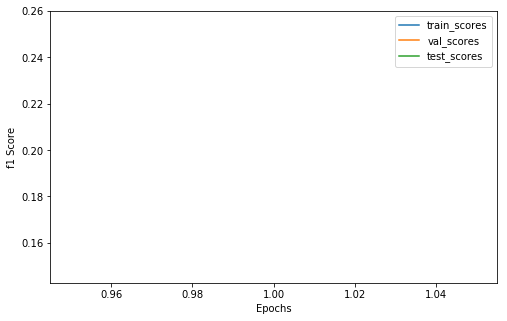

xxxxxxxxxxxxxx epoch: 1 xxxxxxxxxxxxxx
trainloss:  102.59571135044098
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       64     26       6
 1       37     10       1
 2        0      0       0


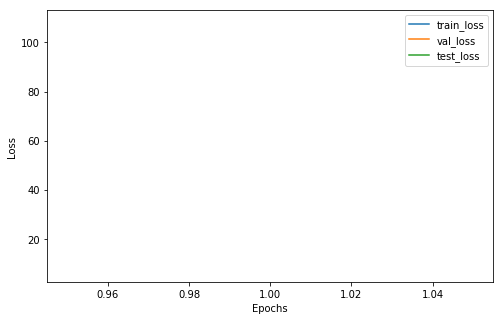

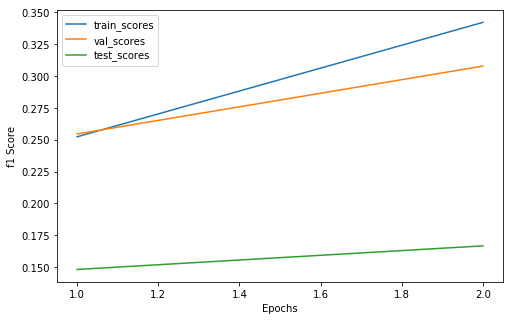

xxxxxxxxxxxxxx epoch: 2 xxxxxxxxxxxxxx
trainloss:  98.77290070056915
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       66     23       6
 1       35     13       1
 2        0      0       0


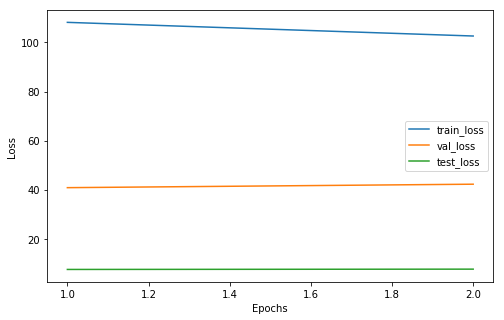

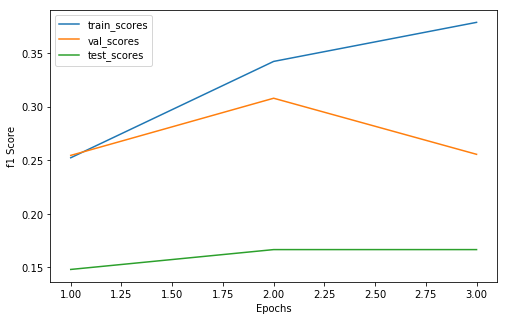

xxxxxxxxxxxxxx epoch: 3 xxxxxxxxxxxxxx
trainloss:  95.16721761226654
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       62     23       6
 1       39     13       1
 2        0      0       0


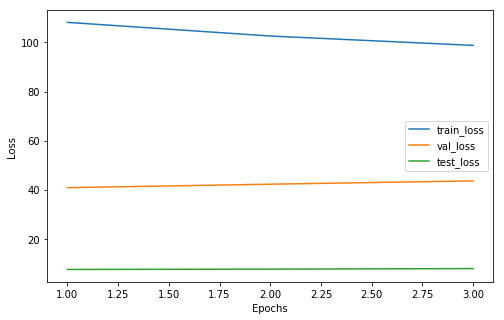

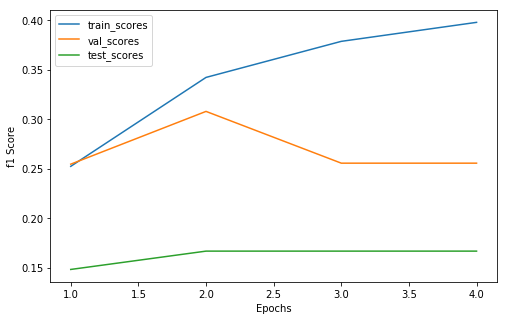

xxxxxxxxxxxxxx epoch: 4 xxxxxxxxxxxxxx
trainloss:  91.98003774881363
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       63     22       6
 1       37     14       1
 2        1      0       0


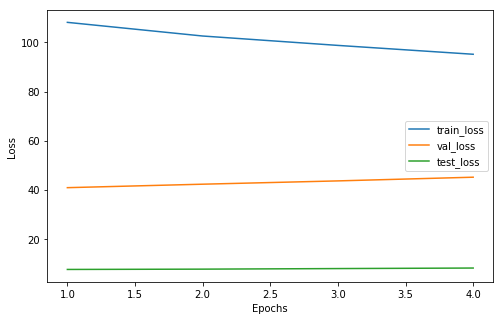

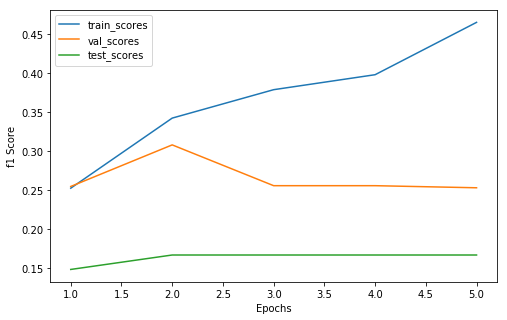

xxxxxxxxxxxxxx epoch: 5 xxxxxxxxxxxxxx
trainloss:  88.97633099555969
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       62     22       6
 1       38     14       1
 2        1      0       0


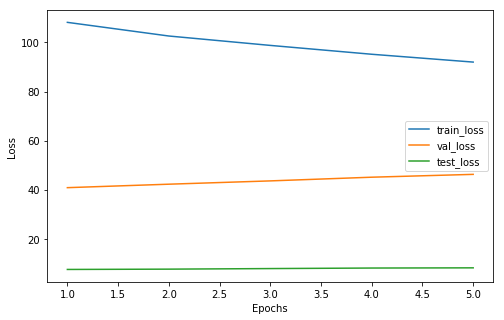

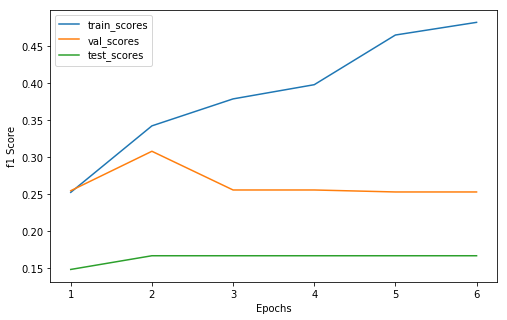

xxxxxxxxxxxxxx epoch: 6 xxxxxxxxxxxxxx
trainloss:  85.11189049482346
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       60     22       6
 1       40     14       1
 2        1      0       0


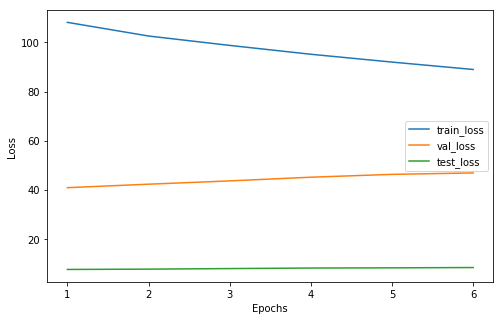

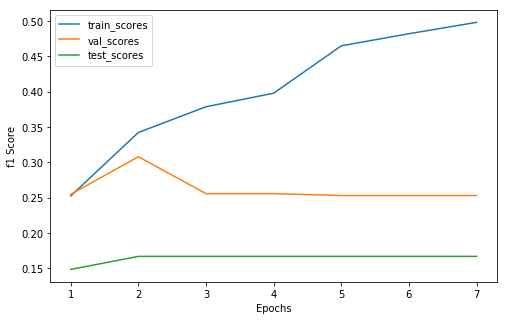

xxxxxxxxxxxxxx epoch: 7 xxxxxxxxxxxxxx
trainloss:  81.37622535228729
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       58     20       4
 1       42     16       3
 2        1      0       0


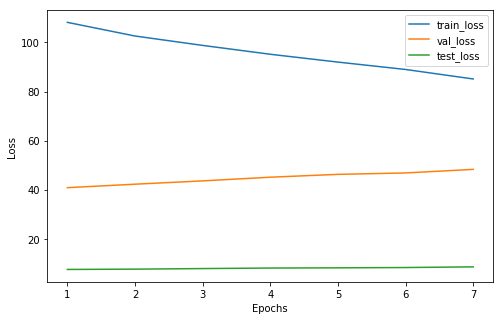

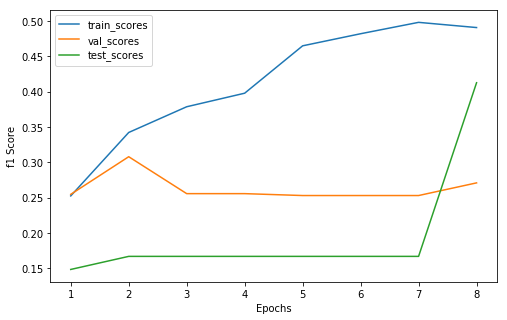

xxxxxxxxxxxxxx epoch: 8 xxxxxxxxxxxxxx
trainloss:  81.82427424192429
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       58     21       6
 1       42     15       1
 2        1      0       0


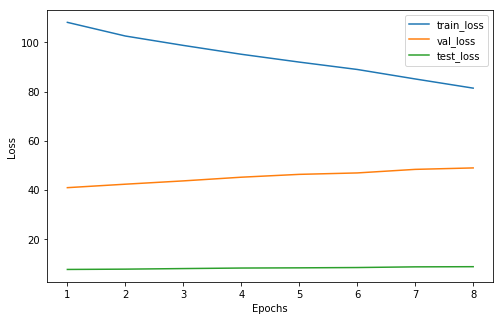

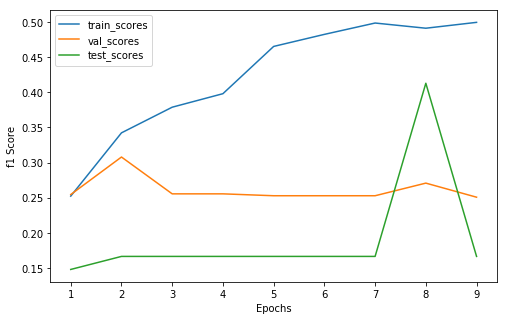

xxxxxxxxxxxxxx epoch: 9 xxxxxxxxxxxxxx
trainloss:  75.77383124828339
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       56     20       5
 1       42     16       2
 2        3      0       0


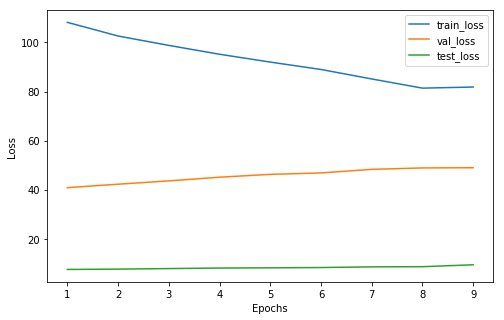

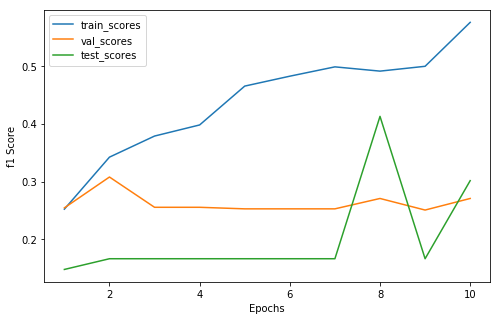

xxxxxxxxxxxxxx epoch: 10 xxxxxxxxxxxxxx
trainloss:  69.88150703907013
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       54     20       5
 1       41     15       2
 2        6      1       0


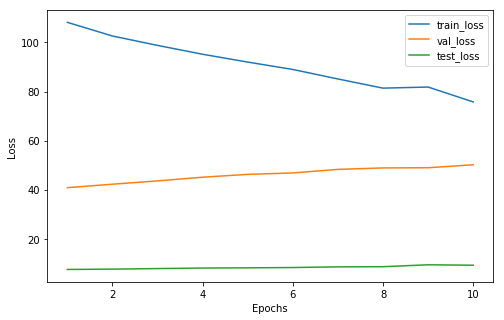

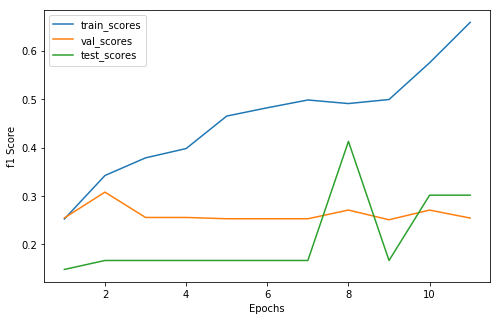

xxxxxxxxxxxxxx epoch: 11 xxxxxxxxxxxxxx
trainloss:  69.57023173570633
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       57     17       4
 1       40     18       3
 2        4      1       0


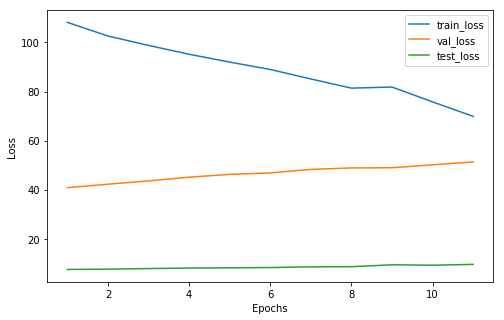

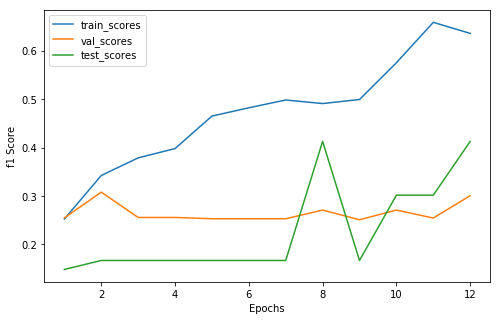

xxxxxxxxxxxxxx epoch: 12 xxxxxxxxxxxxxx
trainloss:  62.108582735061646
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       55     22       3
 1       39     13       4
 2        7      1       0


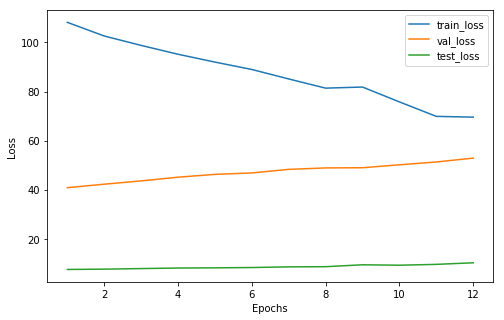

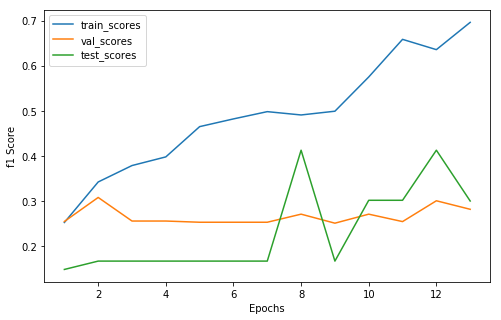

xxxxxxxxxxxxxx epoch: 13 xxxxxxxxxxxxxx
trainloss:  57.31823742389679
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       51     23       5
 1       42     12       2
 2        8      1       0


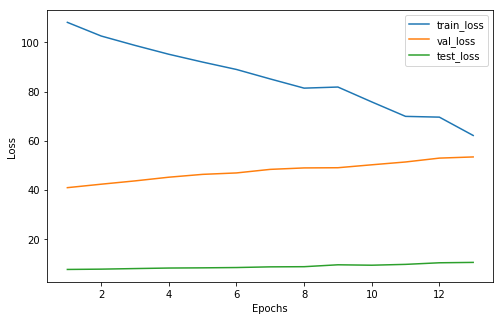

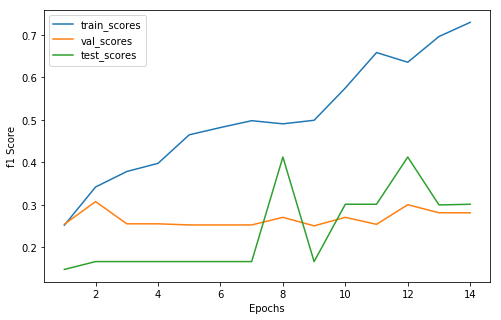

xxxxxxxxxxxxxx epoch: 14 xxxxxxxxxxxxxx
trainloss:  56.661667227745056
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       55     23       5
 1       40     12       2
 2        6      1       0


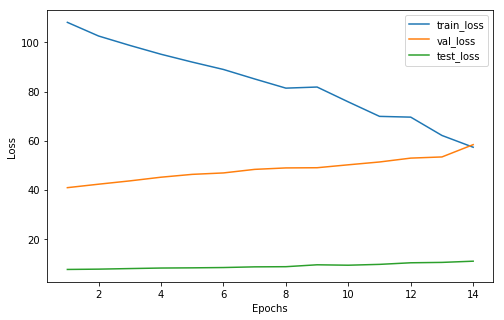

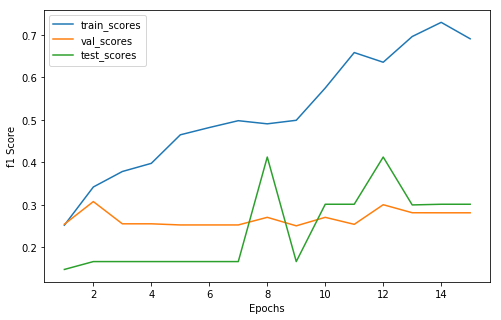

xxxxxxxxxxxxxx epoch: 15 xxxxxxxxxxxxxx
trainloss:  56.17467910051346
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       49     25       3
 1       41     10       4
 2       11      1       0


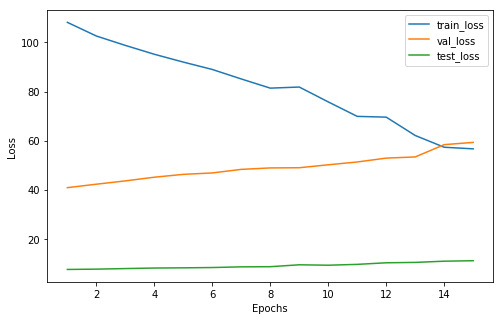

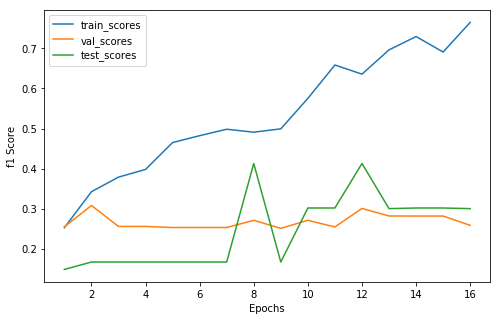

xxxxxxxxxxxxxx epoch: 16 xxxxxxxxxxxxxx
trainloss:  51.312609016895294
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       51     24       3
 1       38     11       4
 2       12      1       0


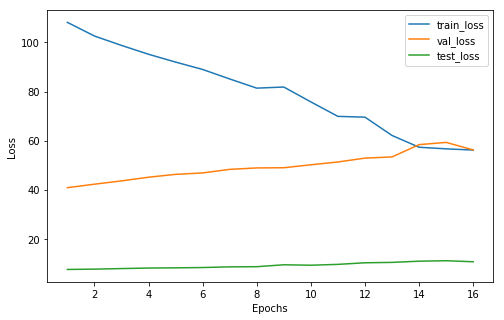

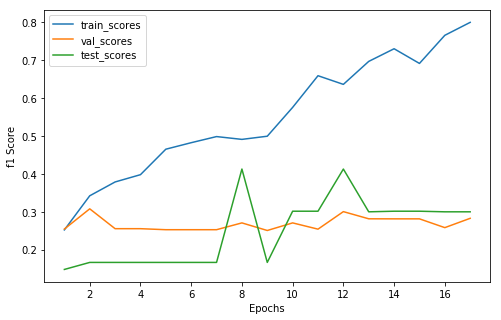

xxxxxxxxxxxxxx epoch: 17 xxxxxxxxxxxxxx
trainloss:  44.70668977499008
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       48     25       3
 1       40     11       4
 2       13      0       0


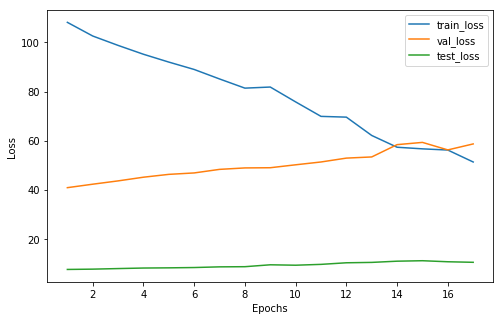

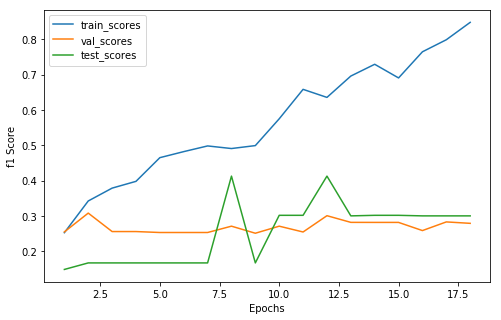

xxxxxxxxxxxxxx epoch: 18 xxxxxxxxxxxxxx
trainloss:  41.91968733072281
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       47     25       4
 1       40     10       3
 2       14      1       0


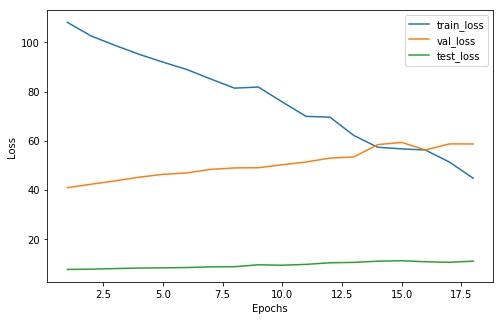

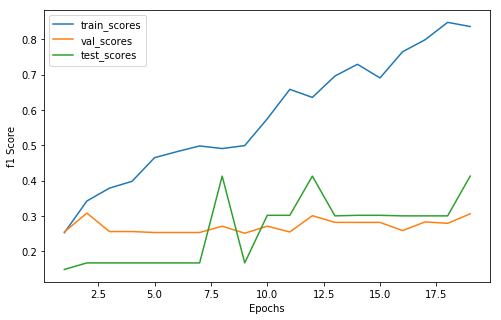

xxxxxxxxxxxxxx epoch: 19 xxxxxxxxxxxxxx
trainloss:  37.29542076587677
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       49     24       4
 1       40     10       2
 2       12      2       1


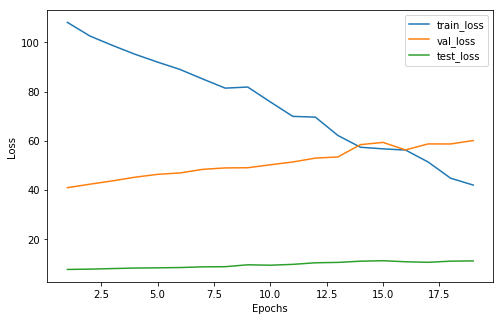

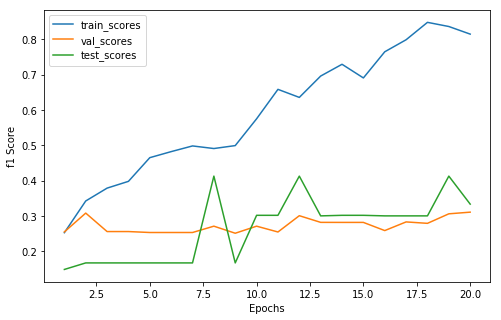

xxxxxxxxxxxxxx epoch: 20 xxxxxxxxxxxxxx
trainloss:  33.3658772110939
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       45     24       3
 1       42     10       3
 2       14      2       1


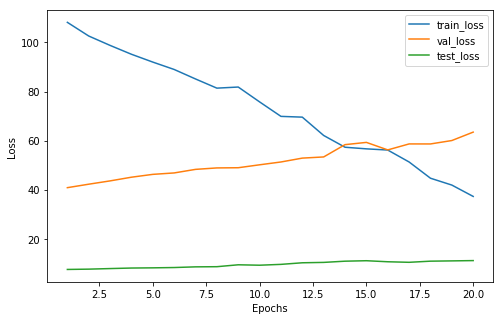

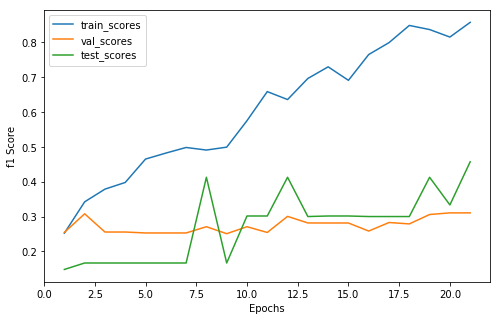

xxxxxxxxxxxxxx epoch: 21 xxxxxxxxxxxxxx
trainloss:  29.394008457660675
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     23       3
 1       42     10       3
 2       13      3       1


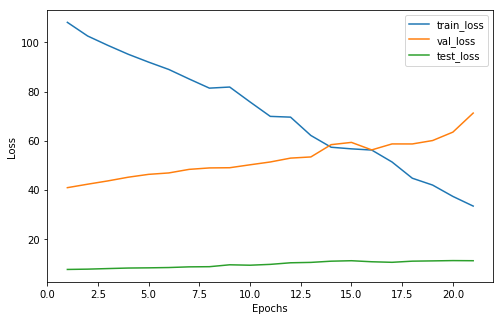

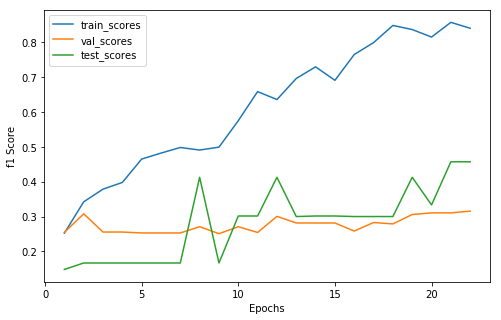

xxxxxxxxxxxxxx epoch: 22 xxxxxxxxxxxxxx
trainloss:  32.64529341459274
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       45     23       3
 1       38      9       3
 2       18      4       1


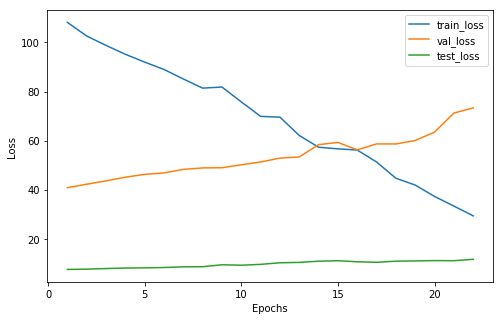

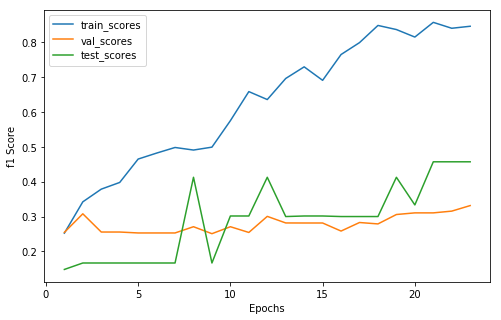

xxxxxxxxxxxxxx epoch: 23 xxxxxxxxxxxxxx
trainloss:  34.58108675479889
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       49     23       3
 1       37      7       3
 2       15      6       1


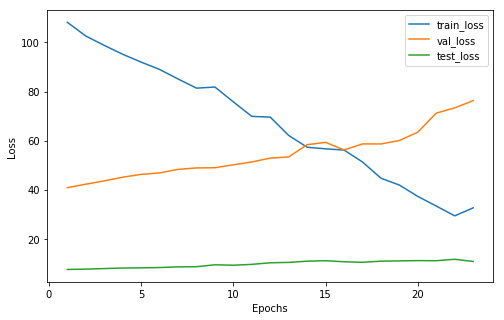

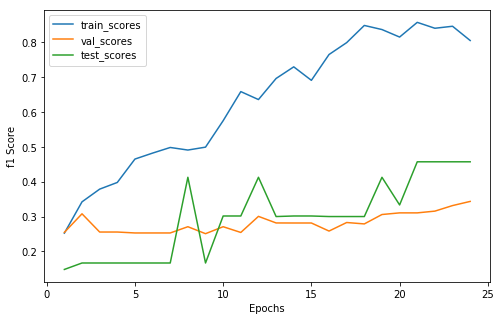

xxxxxxxxxxxxxx epoch: 24 xxxxxxxxxxxxxx
trainloss:  41.32299715280533
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       44     15       2
 1       41     18       5
 2       16      3       0


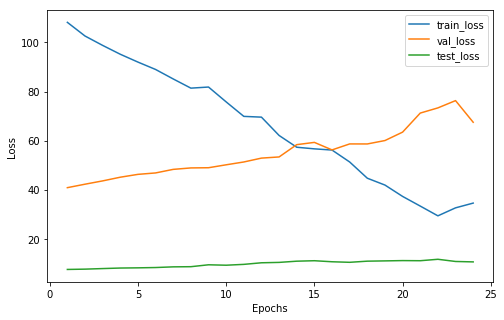

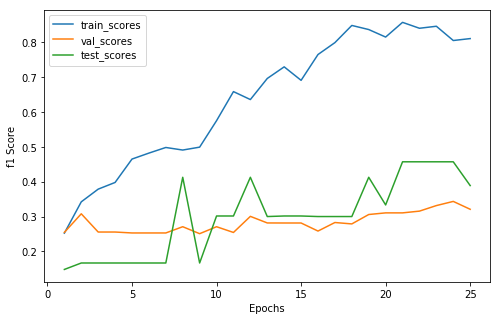

xxxxxxxxxxxxxx epoch: 25 xxxxxxxxxxxxxx
trainloss:  67.2297956943512
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       34     25       3
 1       56      9       4
 2       11      2       0


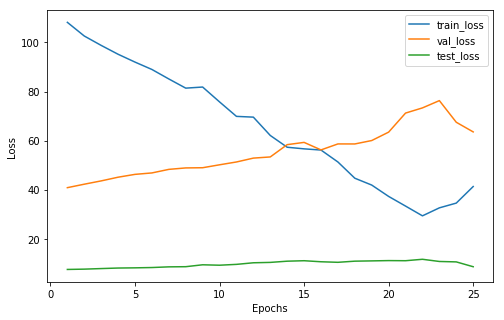

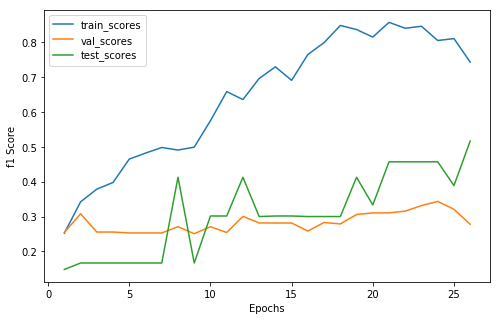

xxxxxxxxxxxxxx epoch: 26 xxxxxxxxxxxxxx
trainloss:  46.35979324579239
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       49     24       5
 1       39      8       2
 2       13      4       0


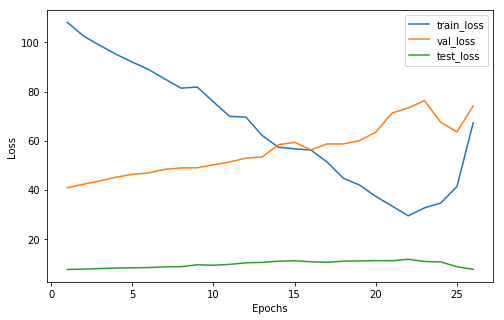

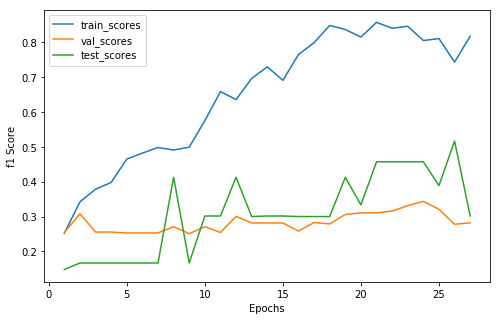

xxxxxxxxxxxxxx epoch: 27 xxxxxxxxxxxxxx
trainloss:  37.742978632450104
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       50     25       4
 1       38      8       3
 2       13      3       0


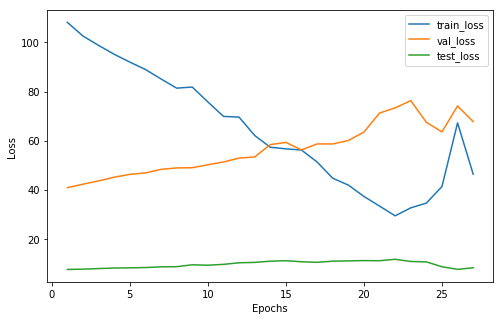

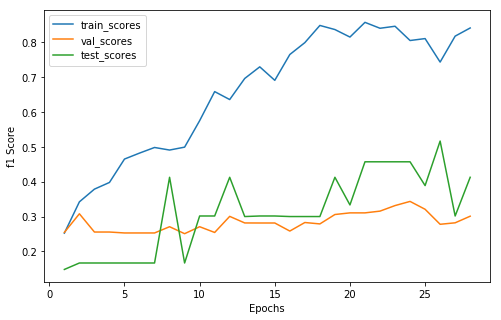

xxxxxxxxxxxxxx epoch: 28 xxxxxxxxxxxxxx
trainloss:  32.63856416940689
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       47     25       5
 1       39      8       2
 2       15      3       0


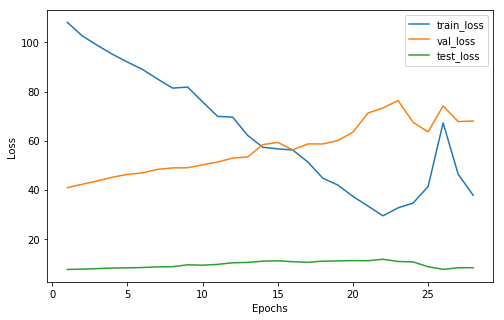

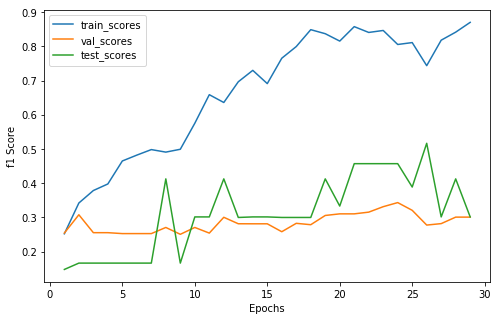

xxxxxxxxxxxxxx epoch: 29 xxxxxxxxxxxxxx
trainloss:  27.450788915157318
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       49     25       4
 1       38      8       2
 2       14      3       1


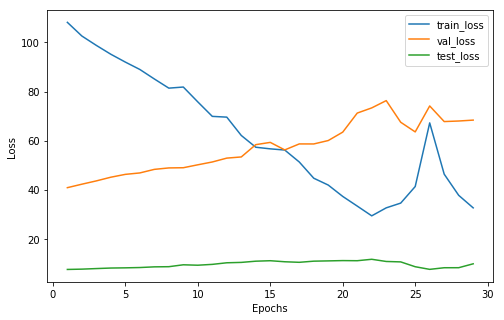

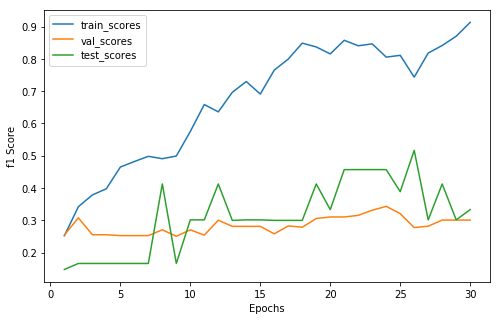

xxxxxxxxxxxxxx epoch: 30 xxxxxxxxxxxxxx
trainloss:  24.302231907844543
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       49     25       4
 1       38      8       2
 2       14      3       1


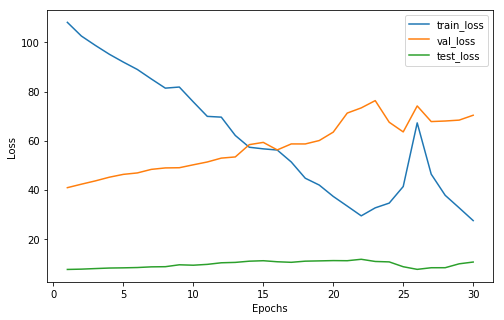

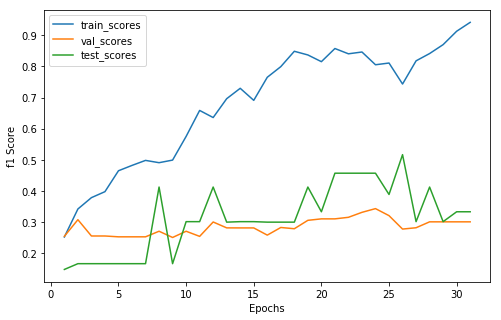

xxxxxxxxxxxxxx epoch: 31 xxxxxxxxxxxxxx
trainloss:  21.6174293756485
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       49     22       4
 1       37      9       2
 2       15      5       1


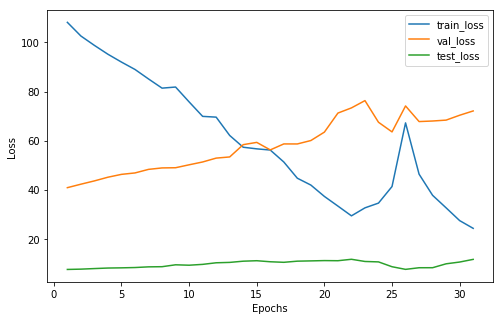

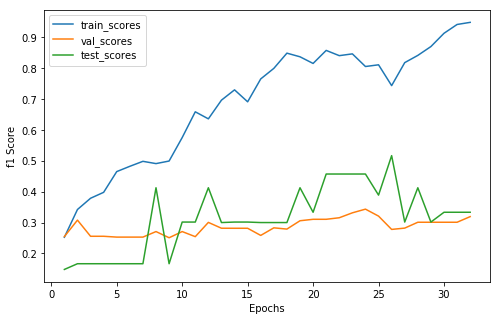

xxxxxxxxxxxxxx epoch: 32 xxxxxxxxxxxxxx
trainloss:  25.860846519470215
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       45     23       2
 1       38      9       5
 2       18      4       0


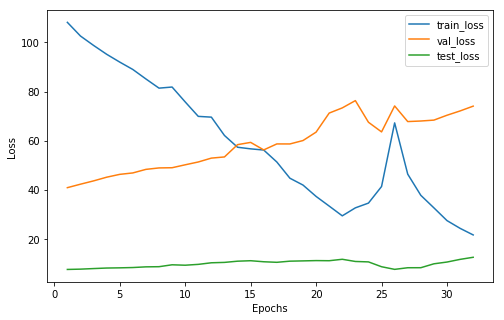

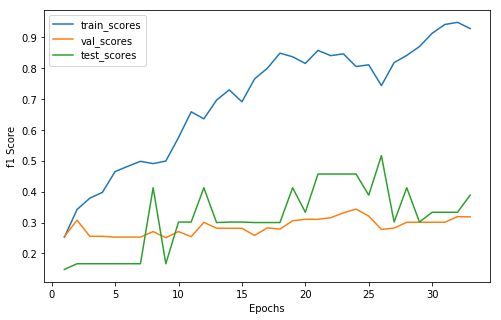

xxxxxxxxxxxxxx epoch: 33 xxxxxxxxxxxxxx
trainloss:  24.047788739204407
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       47     22       4
 1       39     10       2
 2       15      4       1


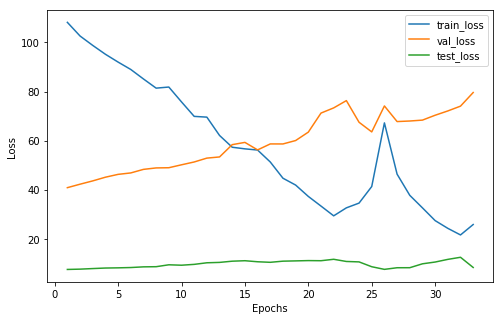

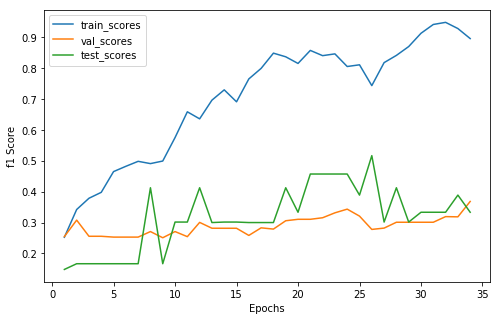

xxxxxxxxxxxxxx epoch: 34 xxxxxxxxxxxxxx
trainloss:  19.618843853473663
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       47     22       4
 1       39     10       2
 2       15      4       1


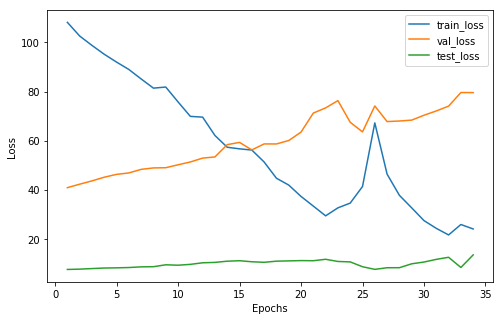

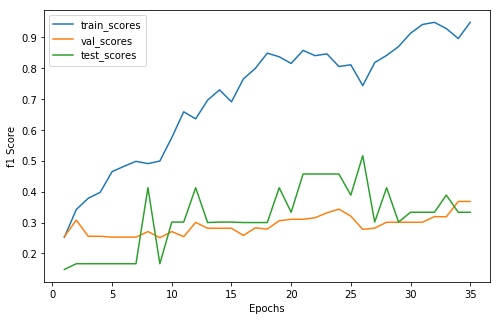

xxxxxxxxxxxxxx epoch: 35 xxxxxxxxxxxxxx
trainloss:  14.63895297050476
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       48     20       4
 1       37     11       2
 2       16      5       1


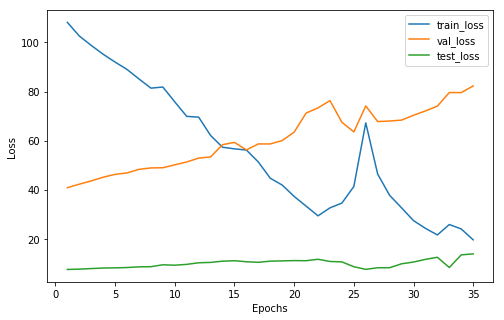

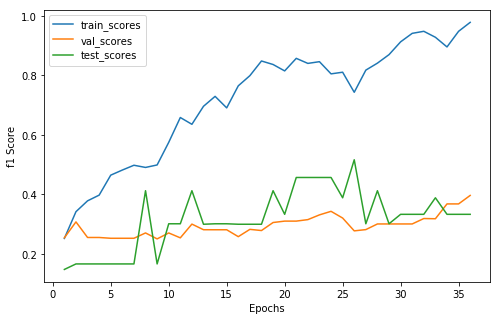

xxxxxxxxxxxxxx epoch: 36 xxxxxxxxxxxxxx
trainloss:  12.548852741718292
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       47     20       4
 1       37     11       2
 2       17      5       1


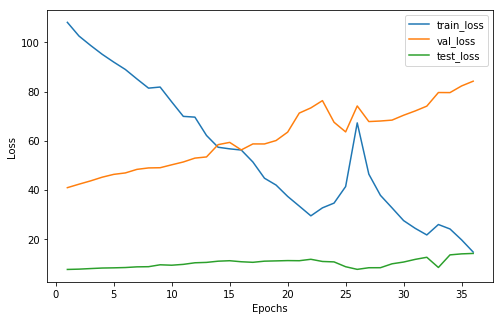

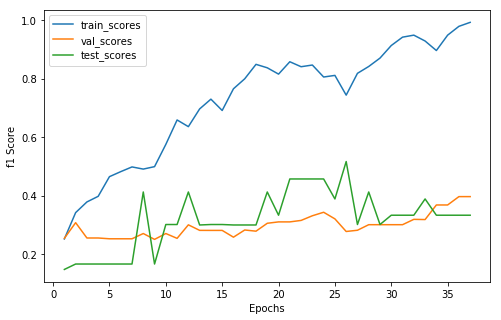

xxxxxxxxxxxxxx epoch: 37 xxxxxxxxxxxxxx
trainloss:  10.900222957134247
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       47     20       4
 1       37     11       2
 2       17      5       1


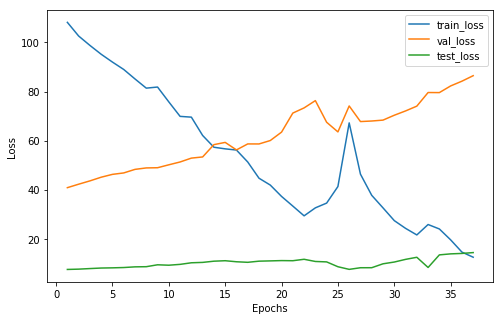

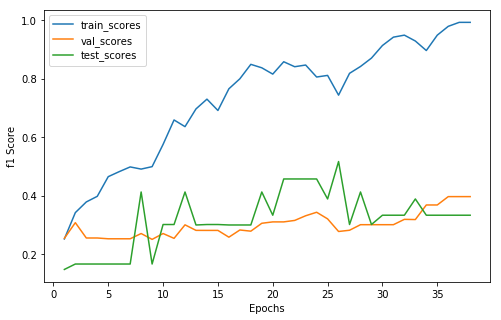

xxxxxxxxxxxxxx epoch: 38 xxxxxxxxxxxxxx
trainloss:  11.517376720905304
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       45     20       4
 1       38     11       2
 2       18      5       1


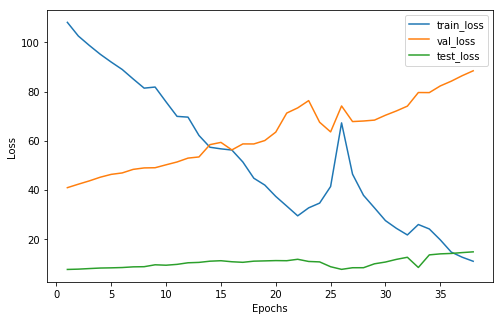

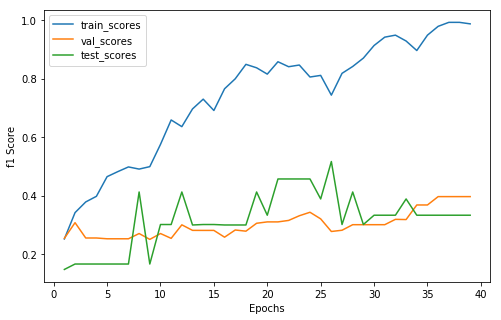

xxxxxxxxxxxxxx epoch: 39 xxxxxxxxxxxxxx
trainloss:  11.445656597614288
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       45     21       4
 1       39     10       2
 2       17      5       1


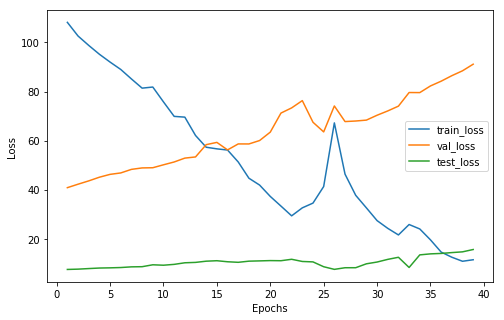

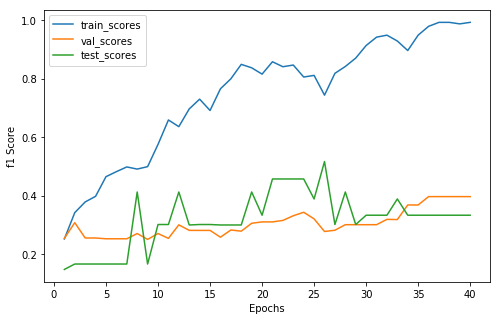

xxxxxxxxxxxxxx epoch: 40 xxxxxxxxxxxxxx
trainloss:  8.869959115982056
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       47     19       4
 1       37     12       2
 2       17      5       1


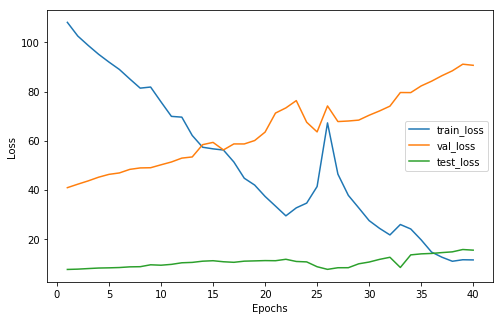

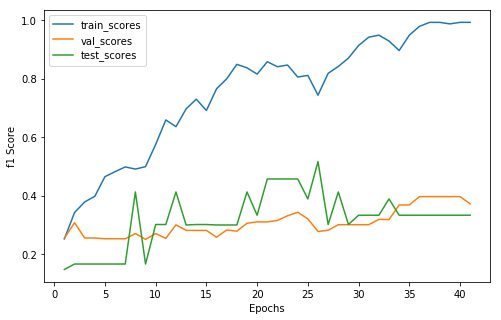

xxxxxxxxxxxxxx epoch: 41 xxxxxxxxxxxxxx
trainloss:  7.404336512088776
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     19       4
 1       38     11       2
 2       17      6       1


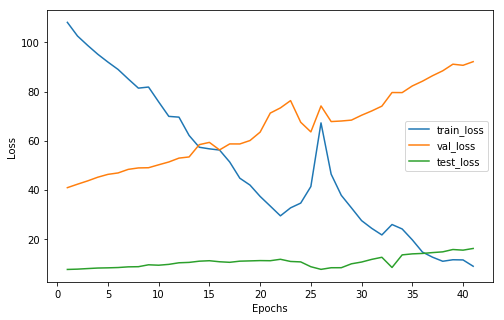

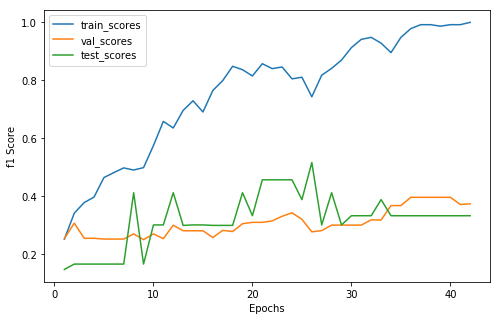

xxxxxxxxxxxxxx epoch: 42 xxxxxxxxxxxxxx
trainloss:  6.081696569919586
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     20       4
 1       38     11       2
 2       17      5       1


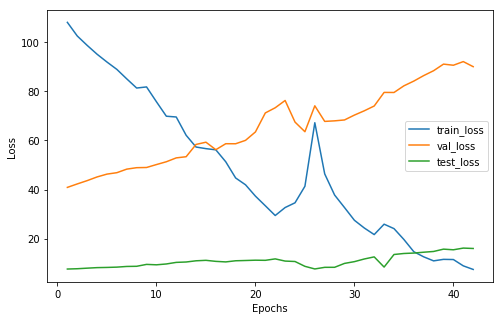

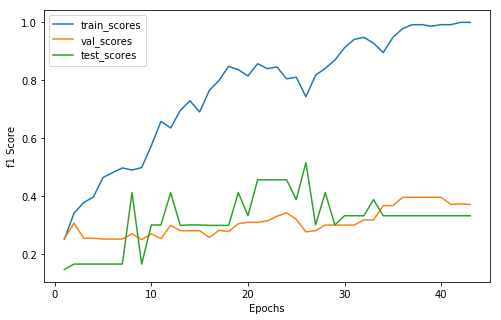

xxxxxxxxxxxxxx epoch: 43 xxxxxxxxxxxxxx
trainloss:  5.144617199897766
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     20       4
 1       38     11       2
 2       17      5       1


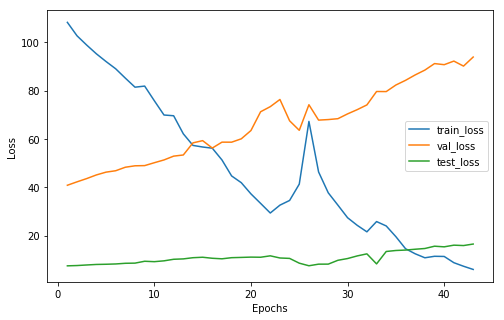

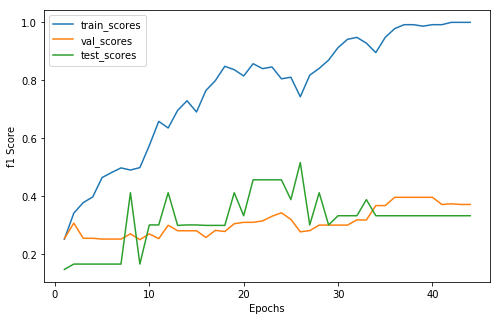

xxxxxxxxxxxxxx epoch: 44 xxxxxxxxxxxxxx
trainloss:  4.5489342212677
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     19       4
 1       38     11       2
 2       17      6       1


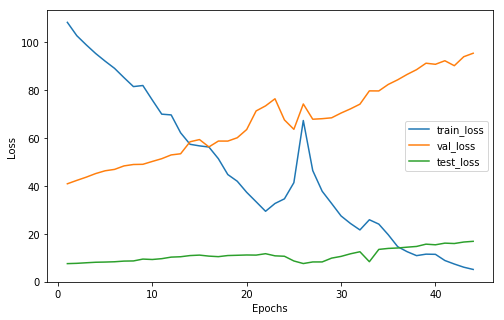

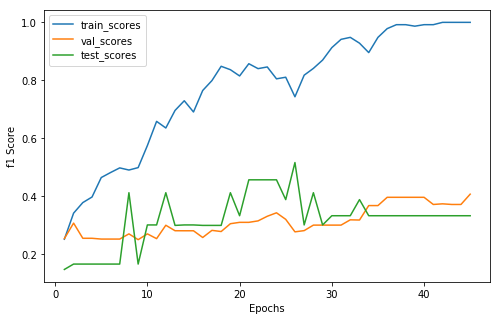

xxxxxxxxxxxxxx epoch: 45 xxxxxxxxxxxxxx
trainloss:  4.033777832984924
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     19       4
 1       38     11       2
 2       17      6       1


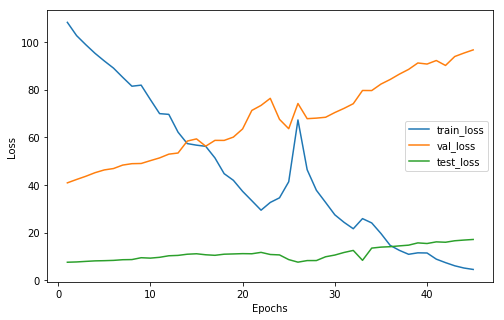

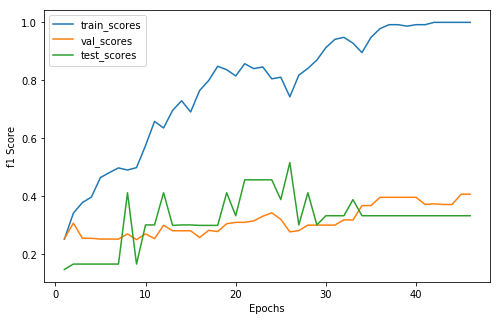

xxxxxxxxxxxxxx epoch: 46 xxxxxxxxxxxxxx
trainloss:  3.616990089416504
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     19       4
 1       38     11       2
 2       17      6       1


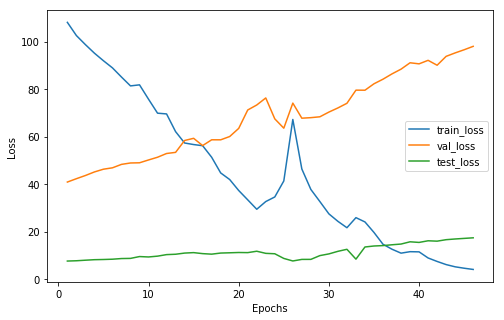

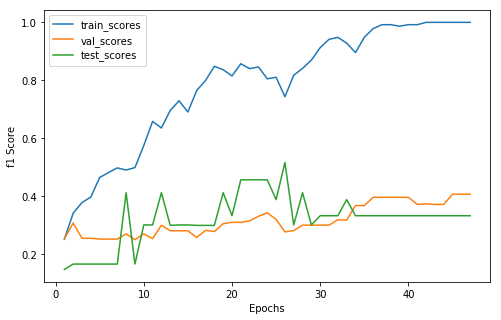

xxxxxxxxxxxxxx epoch: 47 xxxxxxxxxxxxxx
trainloss:  3.2307827472686768
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     19       3
 1       38     11       2
 2       17      6       2


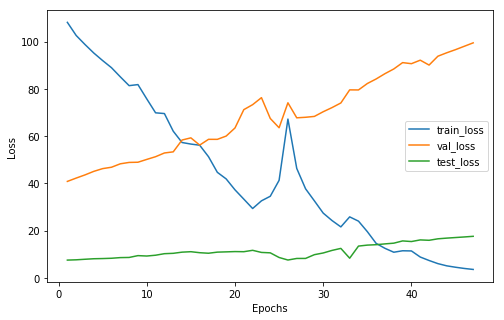

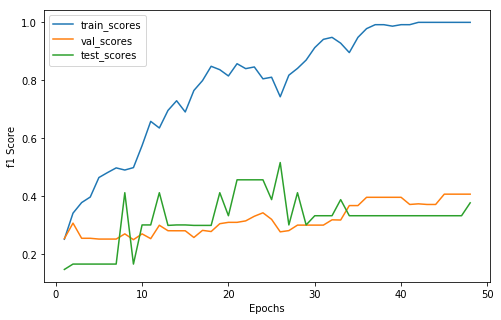

xxxxxxxxxxxxxx epoch: 48 xxxxxxxxxxxxxx
trainloss:  2.925734043121338
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     20       3
 1       38     11       2
 2       17      5       2


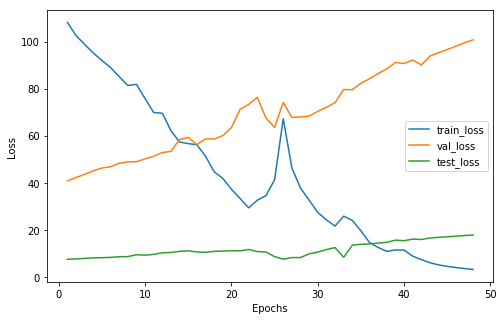

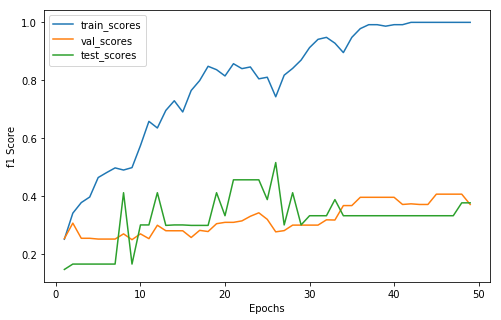

xxxxxxxxxxxxxx epoch: 49 xxxxxxxxxxxxxx
trainloss:  2.6211559772491455
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     18       3
 1       38     11       2
 2       17      7       2


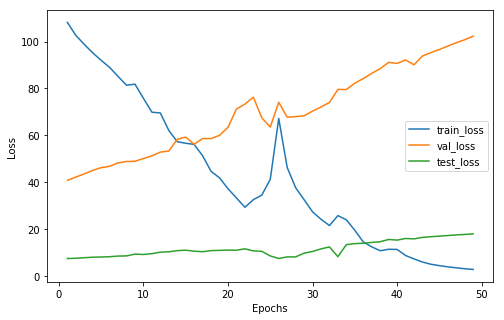

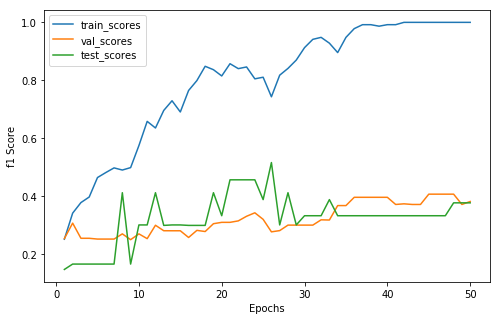

xxxxxxxxxxxxxx epoch: 50 xxxxxxxxxxxxxx
trainloss:  2.3790687322616577
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     19       3
 1       38     11       2
 2       17      6       2


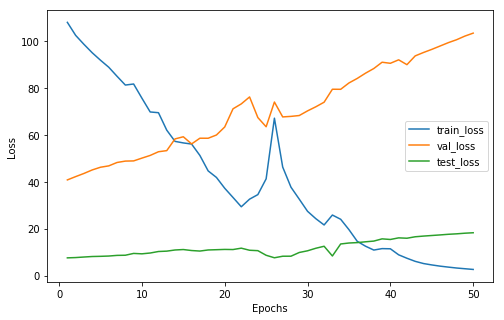

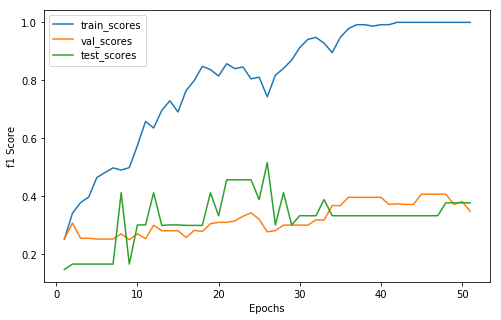

xxxxxxxxxxxxxx epoch: 51 xxxxxxxxxxxxxx
trainloss:  2.1508069038391113
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     19       3
 1       38     11       2
 2       17      6       2


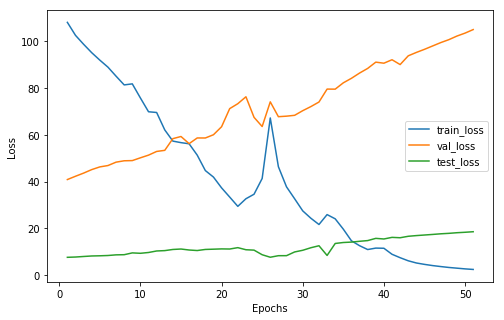

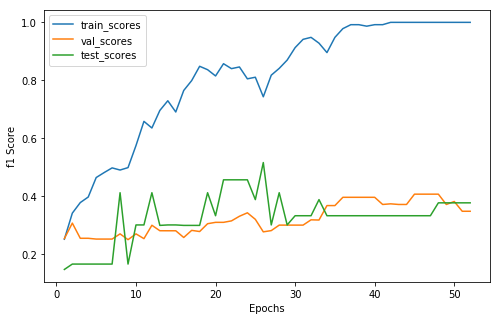

xxxxxxxxxxxxxx epoch: 52 xxxxxxxxxxxxxx
trainloss:  2.078867793083191
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     14       1
 1       38     13       3
 2       17      9       3


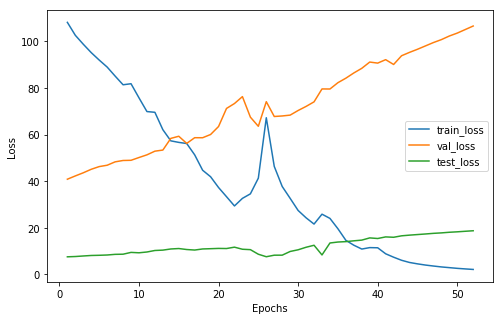

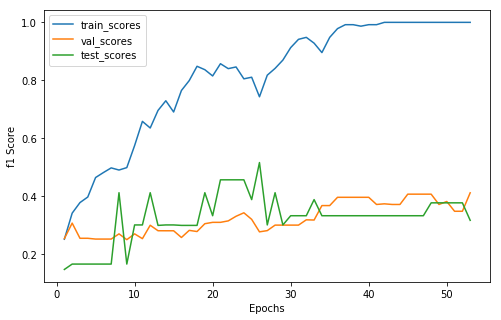

xxxxxxxxxxxxxx epoch: 53 xxxxxxxxxxxxxx
trainloss:  35.48859238624573
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       43     21       3
 1       36     10       3
 2       22      5       1


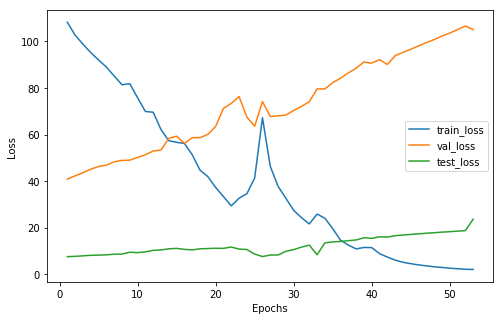

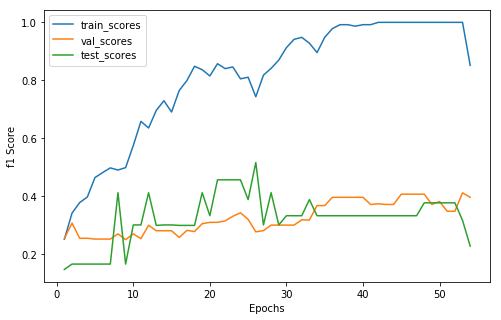

xxxxxxxxxxxxxx epoch: 54 xxxxxxxxxxxxxx
trainloss:  29.258409202098846
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     21       2
 1       39      9       4
 2       16      6       1


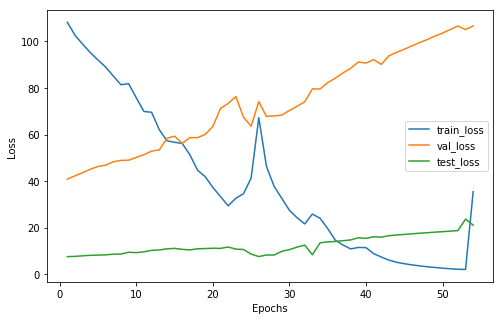

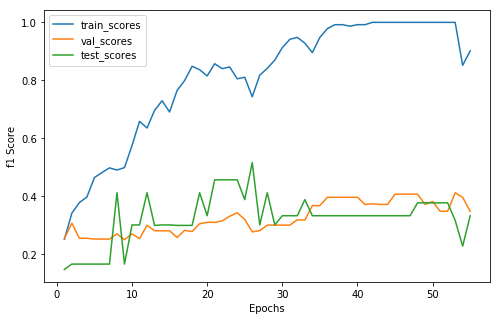

xxxxxxxxxxxxxx epoch: 55 xxxxxxxxxxxxxx
trainloss:  12.427062332630157
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     18       2
 1       36     13       4
 2       19      5       1


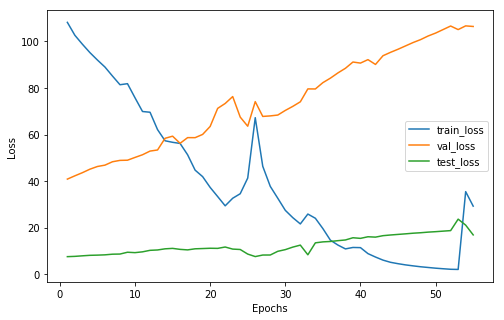

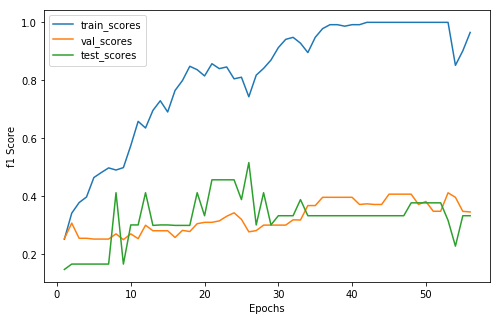

xxxxxxxxxxxxxx epoch: 56 xxxxxxxxxxxxxx
trainloss:  11.859240114688873
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     18       2
 1       38     11       4
 2       17      7       1


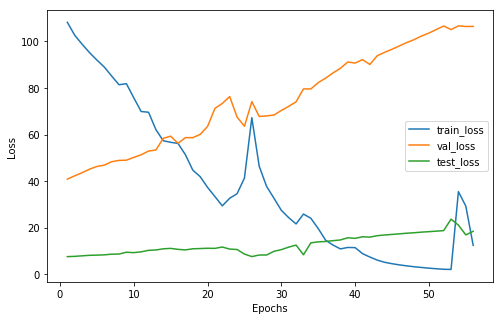

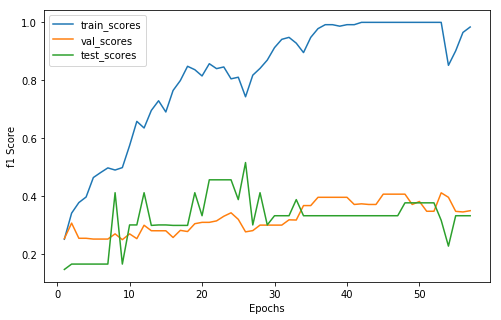

xxxxxxxxxxxxxx epoch: 57 xxxxxxxxxxxxxx
trainloss:  13.270719051361084
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       44     19       3
 1       38     10       3
 2       19      7       1


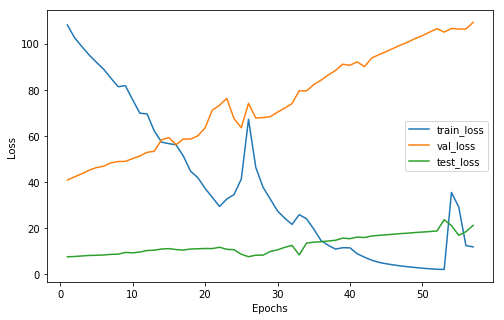

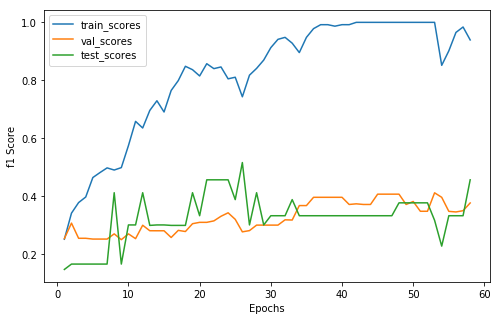

xxxxxxxxxxxxxx epoch: 58 xxxxxxxxxxxxxx
trainloss:  10.35643059015274
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       47     18       2
 1       36     11       4
 2       18      7       1


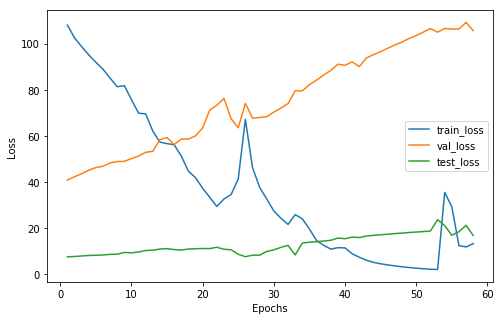

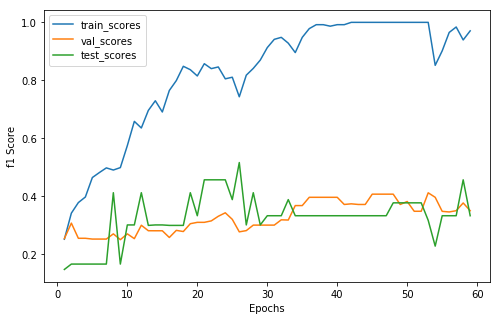

xxxxxxxxxxxxxx epoch: 59 xxxxxxxxxxxxxx
trainloss:  6.694922089576721
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     17       2
 1       38     12       4
 2       17      7       1


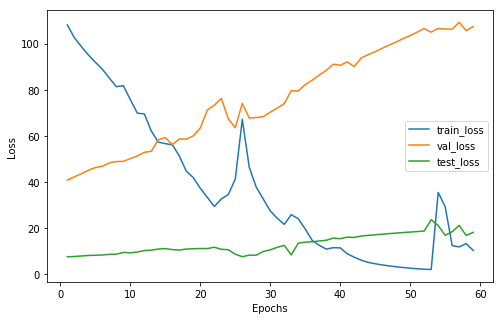

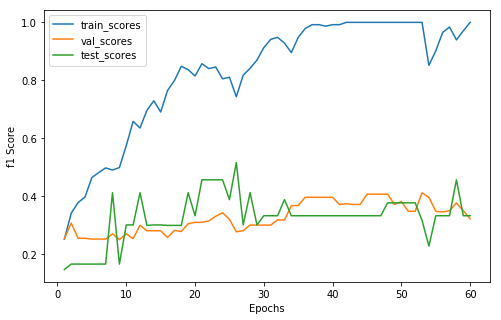

xxxxxxxxxxxxxx epoch: 60 xxxxxxxxxxxxxx
trainloss:  5.758915066719055
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     16       2
 1       38     12       4
 2       17      8       1


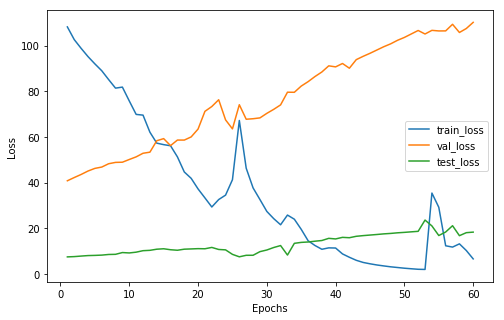

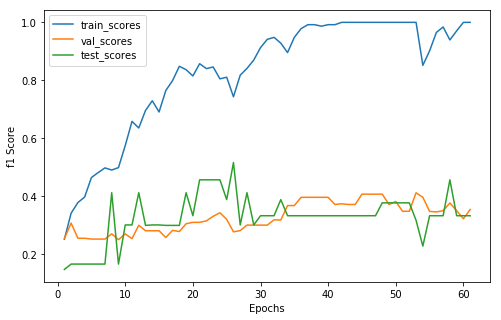

xxxxxxxxxxxxxx epoch: 61 xxxxxxxxxxxxxx
trainloss:  5.066869735717773
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     16       2
 1       38     11       4
 2       17      9       1


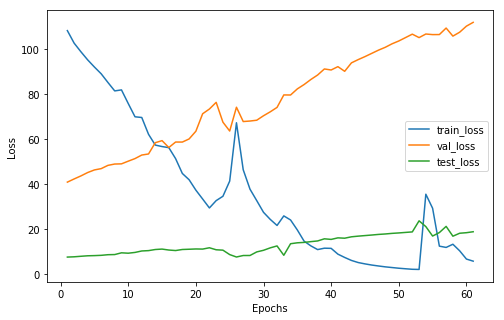

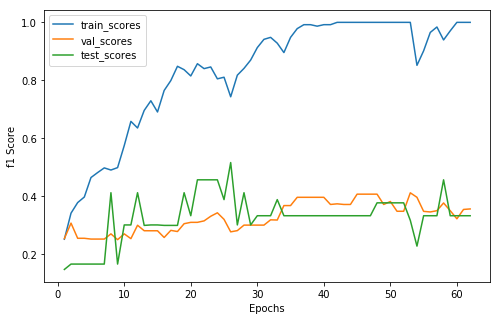

xxxxxxxxxxxxxx epoch: 62 xxxxxxxxxxxxxx
trainloss:  4.2064303159713745
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     17       2
 1       38     11       4
 2       17      8       1


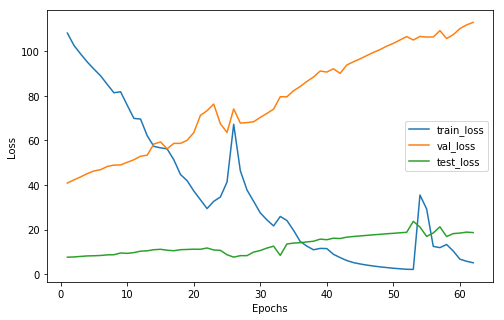

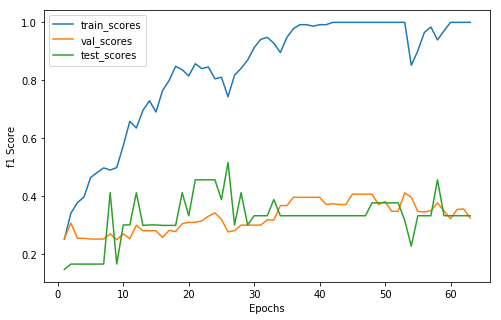

xxxxxxxxxxxxxx epoch: 63 xxxxxxxxxxxxxx
trainloss:  3.3252804279327393
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     16       3
 1       38     11       3
 2       17      9       1


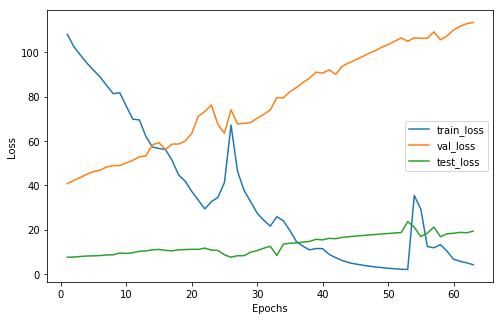

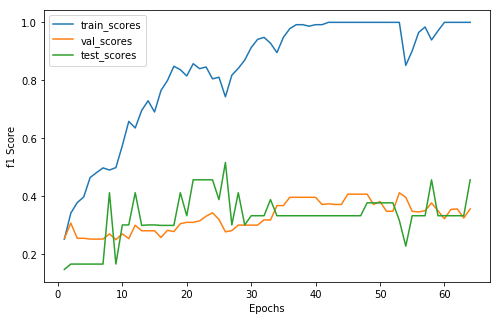

xxxxxxxxxxxxxx epoch: 64 xxxxxxxxxxxxxx
trainloss:  3.089354634284973
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     12       3
 2       17      9       1


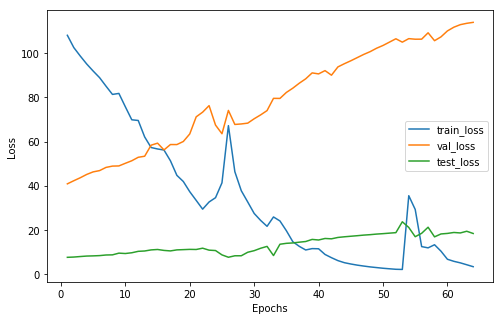

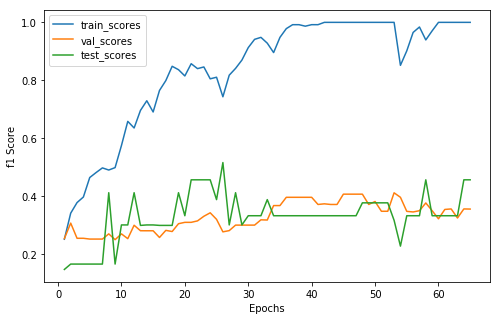

xxxxxxxxxxxxxx epoch: 65 xxxxxxxxxxxxxx
trainloss:  2.257522940635681
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     12       3
 2       17      9       1


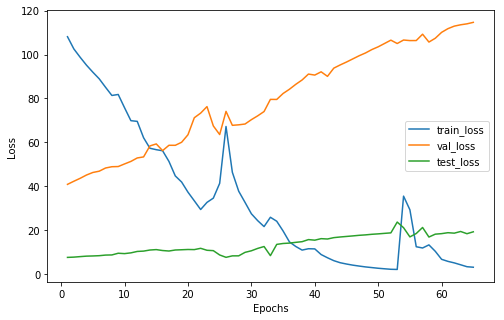

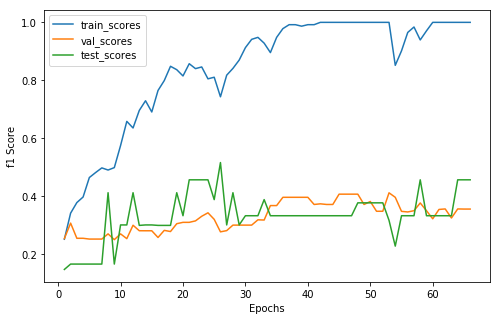

xxxxxxxxxxxxxx epoch: 66 xxxxxxxxxxxxxx
trainloss:  1.7711398601531982
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     16       3
 1       38     12       3
 2       17      8       1


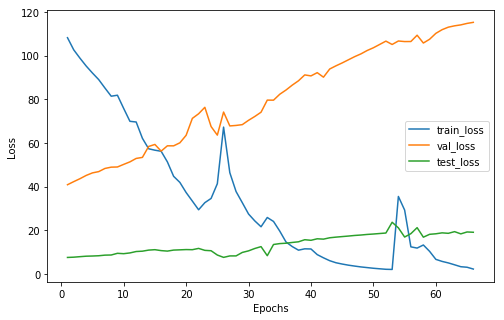

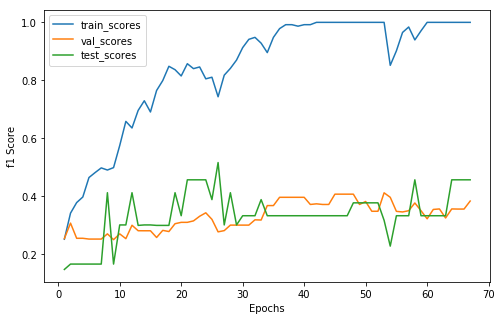

xxxxxxxxxxxxxx epoch: 67 xxxxxxxxxxxxxx
trainloss:  1.5849987268447876
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     16       3
 1       38     12       3
 2       17      8       1


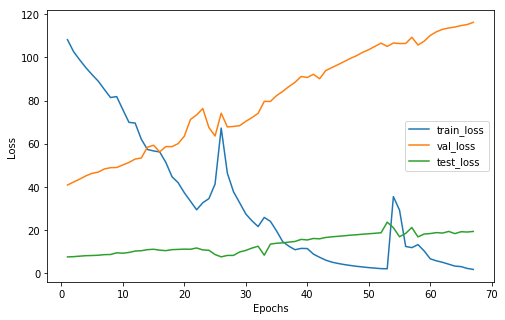

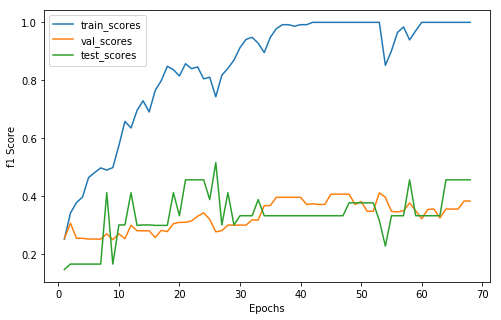

xxxxxxxxxxxxxx epoch: 68 xxxxxxxxxxxxxx
trainloss:  1.4365675449371338
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     13       3
 2       17      8       1


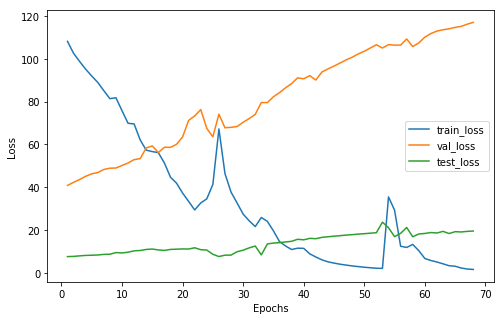

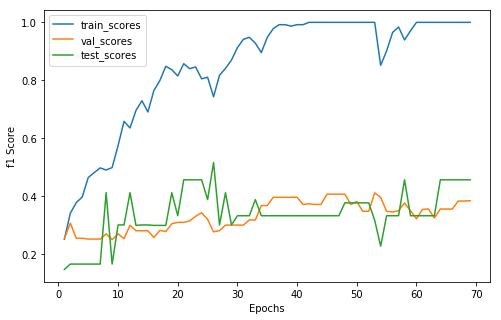

xxxxxxxxxxxxxx epoch: 69 xxxxxxxxxxxxxx
trainloss:  1.3105705976486206
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     13       3
 2       17      8       1


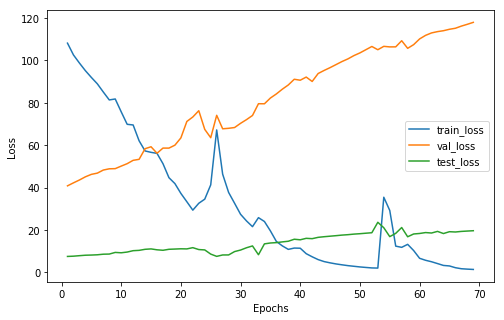

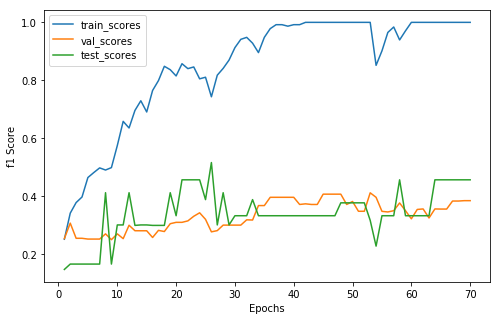

xxxxxxxxxxxxxx epoch: 70 xxxxxxxxxxxxxx
trainloss:  1.1997166872024536
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     13       3
 2       17      8       1


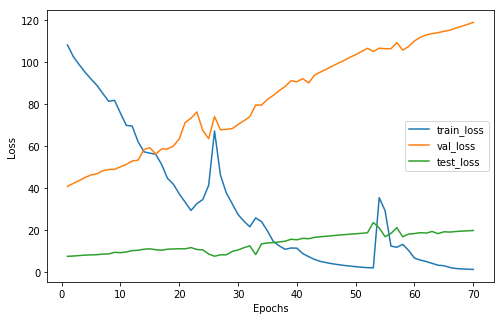

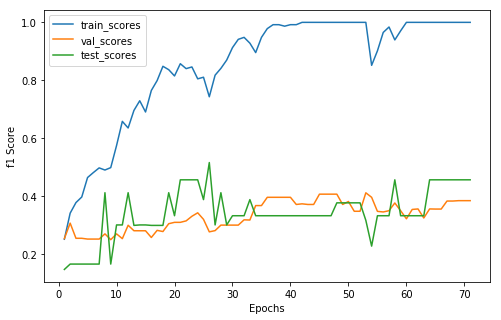

xxxxxxxxxxxxxx epoch: 71 xxxxxxxxxxxxxx
trainloss:  1.1004254817962646
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     13       3
 2       17      8       1


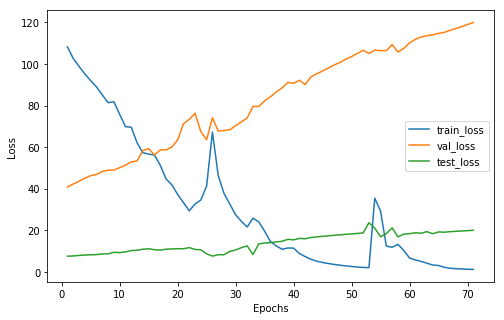

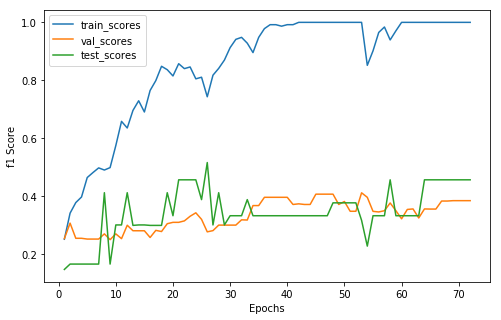

xxxxxxxxxxxxxx epoch: 72 xxxxxxxxxxxxxx
trainloss:  1.0108797550201416
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     14       3
 1       38     14       3
 2       17      8       1


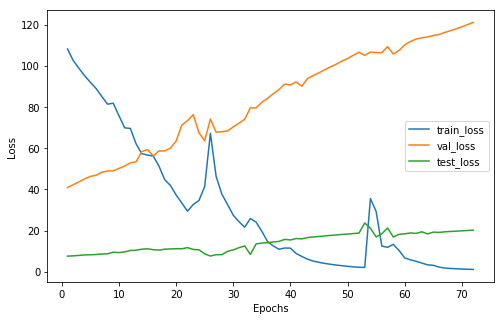

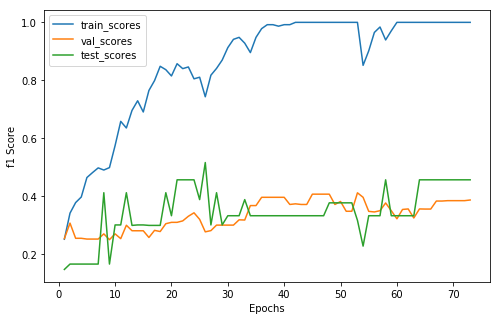

xxxxxxxxxxxxxx epoch: 73 xxxxxxxxxxxxxx
trainloss:  0.9298639297485352
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     13       3
 1       38     14       3
 2       17      9       1


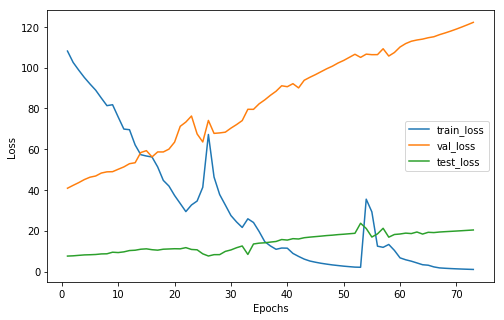

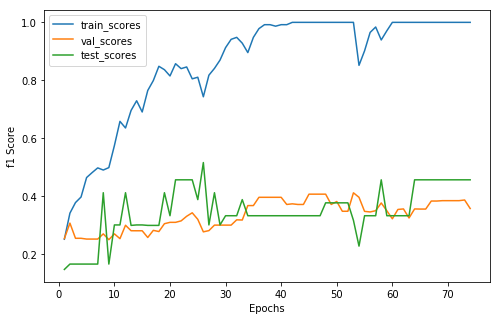

xxxxxxxxxxxxxx epoch: 74 xxxxxxxxxxxxxx
trainloss:  0.8564326763153076
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     13       3
 1       38     14       3
 2       17      9       1


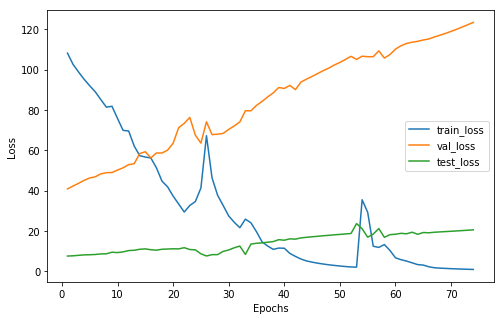

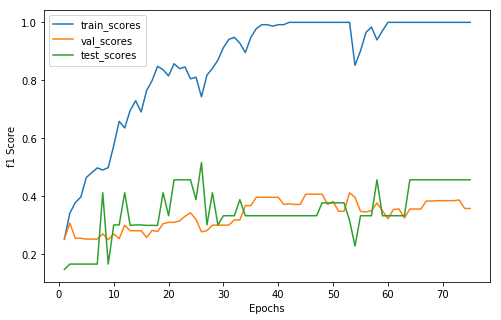

xxxxxxxxxxxxxx epoch: 75 xxxxxxxxxxxxxx
trainloss:  0.7897210121154785
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     13       3
 1       38     14       3
 2       17      9       1


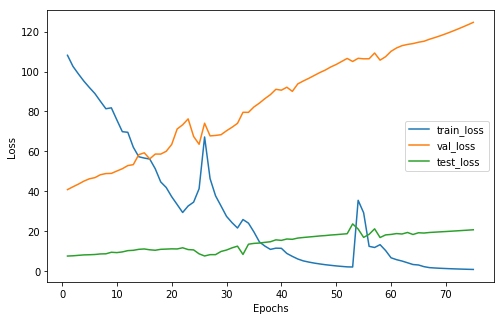

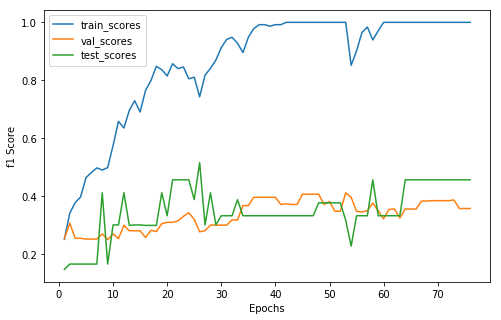

xxxxxxxxxxxxxx epoch: 76 xxxxxxxxxxxxxx
trainloss:  0.7287411689758301
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     13       3
 1       38     14       3
 2       17      9       1


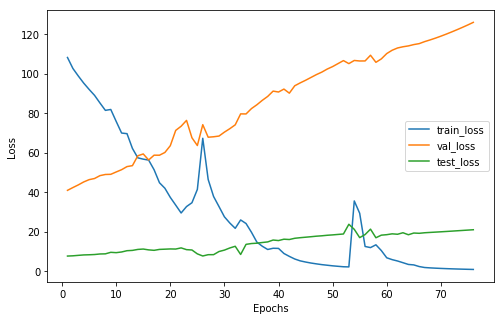

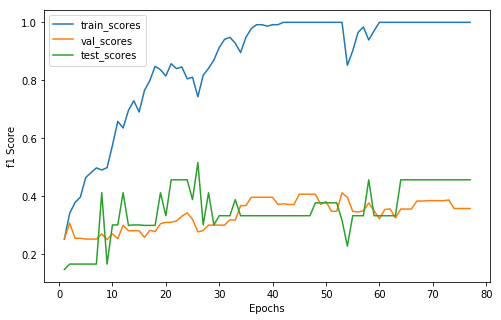

xxxxxxxxxxxxxx epoch: 77 xxxxxxxxxxxxxx
trainloss:  0.6722636222839355
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     13       3
 1       38     14       3
 2       17      9       1


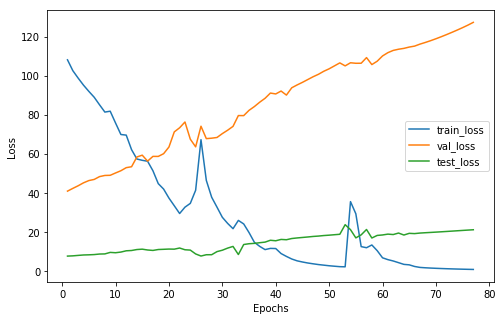

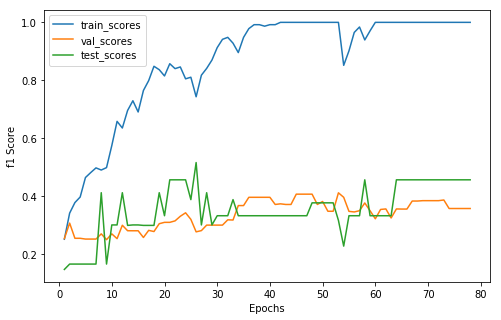

xxxxxxxxxxxxxx epoch: 78 xxxxxxxxxxxxxx
trainloss:  0.6208057403564453
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     13       3
 1       38     14       2
 2       17      9       2


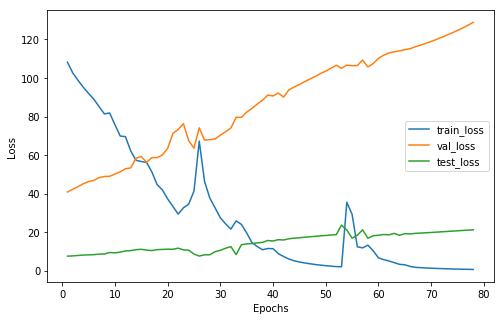

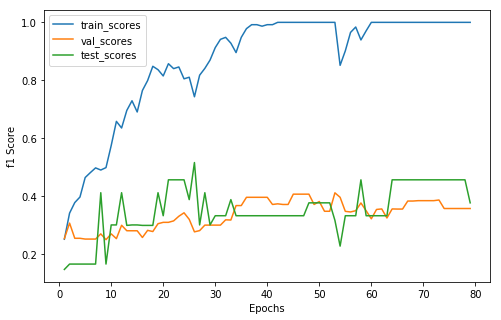

xxxxxxxxxxxxxx epoch: 79 xxxxxxxxxxxxxx
trainloss:  0.5753393173217773
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     13       3
 1       38     14       2
 2       17      9       2


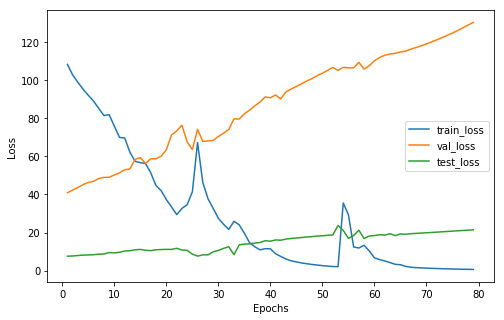

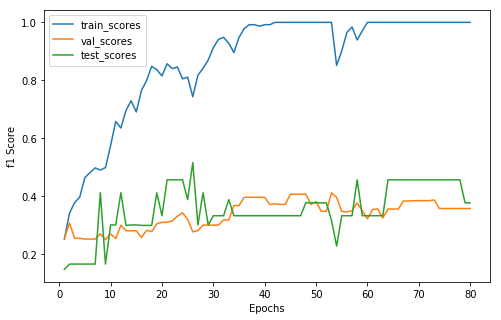

xxxxxxxxxxxxxx epoch: 80 xxxxxxxxxxxxxx
trainloss:  0.534113883972168
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     14       3
 1       38     14       2
 2       17      8       2


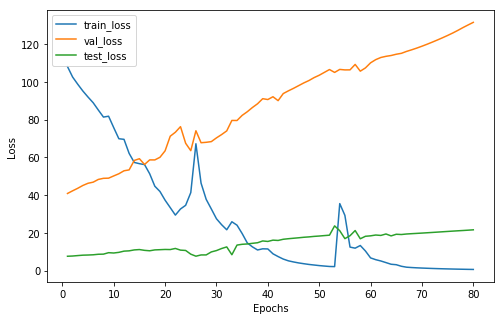

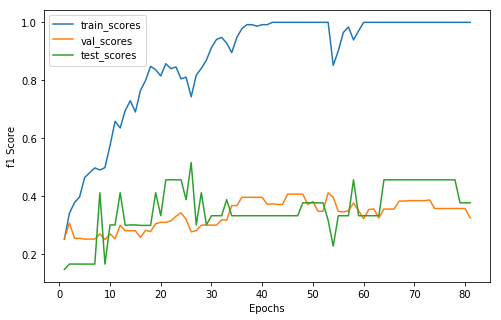

xxxxxxxxxxxxxx epoch: 81 xxxxxxxxxxxxxx
trainloss:  0.49640679359436035
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     14       3
 1       38     14       2
 2       17      8       2


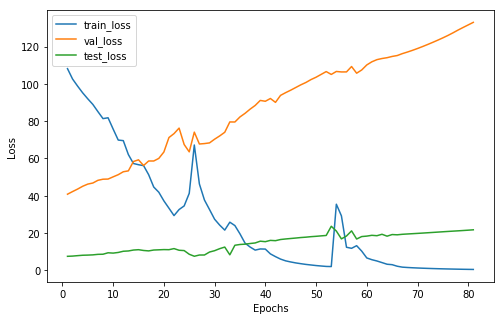

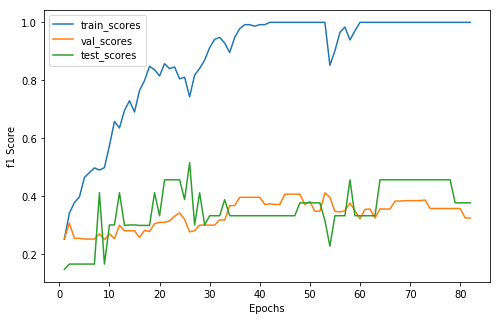

xxxxxxxxxxxxxx epoch: 82 xxxxxxxxxxxxxx
trainloss:  0.4618113040924072
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     14       3
 1       38     14       2
 2       17      8       2


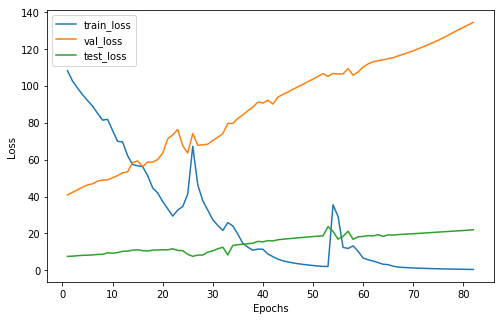

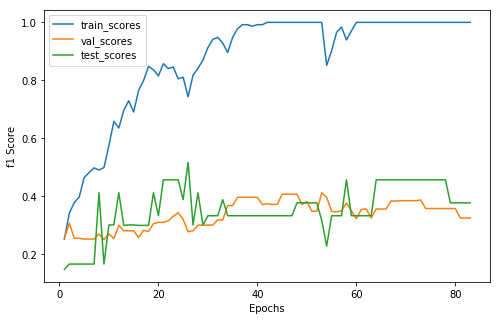

xxxxxxxxxxxxxx epoch: 83 xxxxxxxxxxxxxx
trainloss:  0.4299776554107666
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     14       2
 2       17      7       2


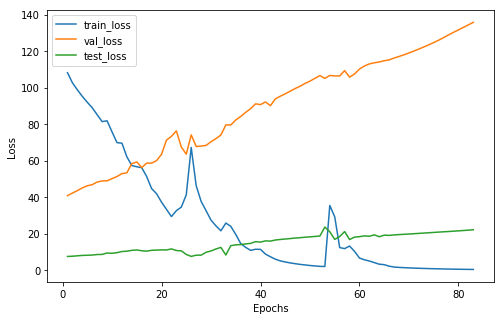

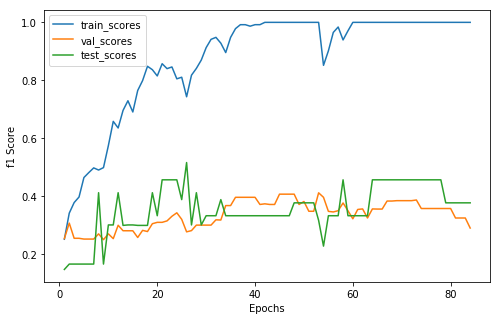

xxxxxxxxxxxxxx epoch: 84 xxxxxxxxxxxxxx
trainloss:  0.40062785148620605
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     14       2
 2       17      7       2


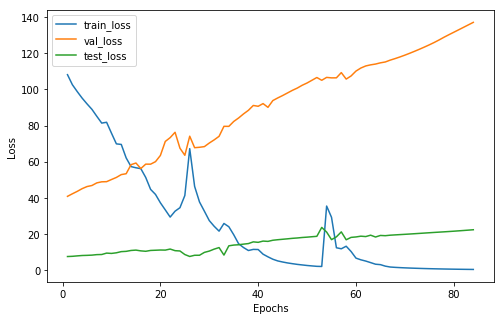

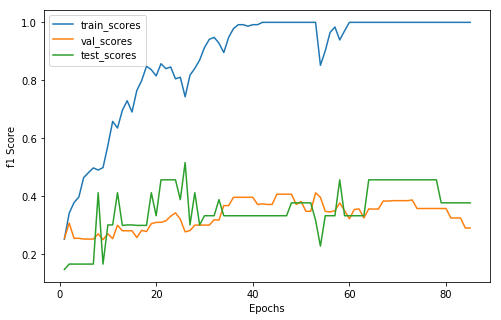

xxxxxxxxxxxxxx epoch: 85 xxxxxxxxxxxxxx
trainloss:  0.3735034465789795
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     14       2
 2       17      7       2


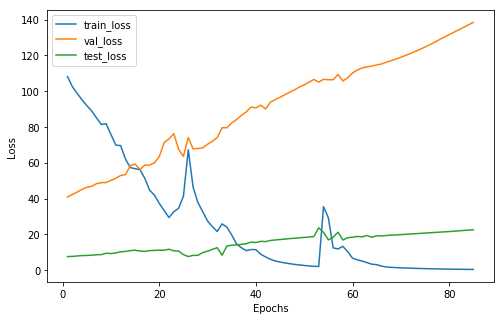

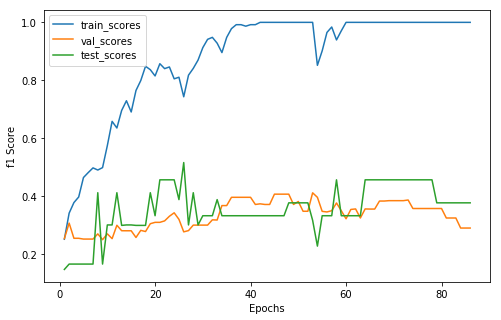

xxxxxxxxxxxxxx epoch: 86 xxxxxxxxxxxxxx
trainloss:  0.34839701652526855
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0       46     15       3
 1       38     14       2
 2       17      7       2


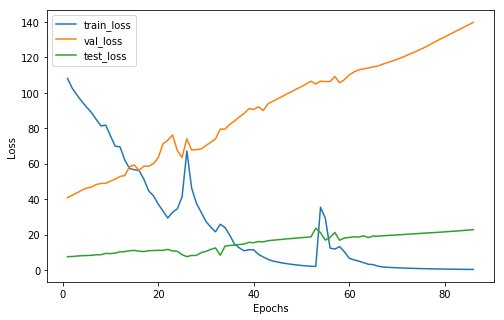

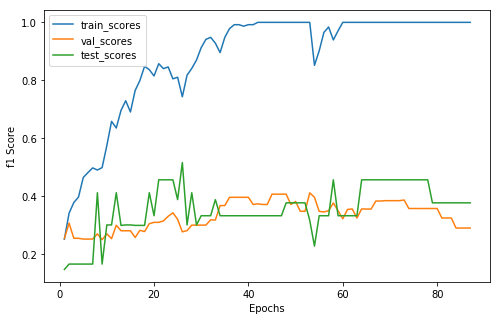

xxxxxxxxxxxxxx epoch: 87 xxxxxxxxxxxxxx


KeyboardInterrupt: 

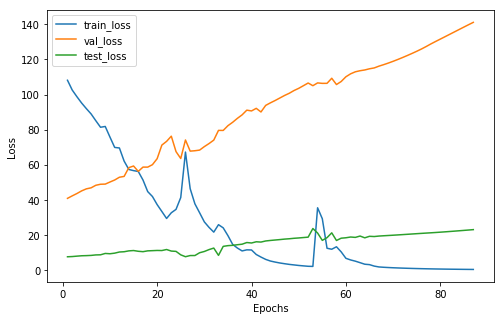

In [195]:
loss_over_epochs, scores_over_epochs = plotting.get_empty_stat_over_n_epoch_dictionaries()

for epoch in range(n_epochs):
    print("xxxxxxxxxxxxxx epoch: {} xxxxxxxxxxxxxx".format(epoch))
    train_loss, train_labels, train_preds =  trainer.evaluate_set(data, 'train_ids', model, criterion, optimizer)
    val_loss, val_labels, val_preds =  trainer.evaluate_set(data, 'val_ids', model, criterion)
    test_loss, test_labels, test_preds =  trainer.evaluate_set(data, 'test_ids', model, criterion)
    
    print("trainloss: ", train_loss)
    print("Predicted Label Distribution:")
    print(statistics.get_train_test_val_label_counts_from_predictions(train_preds, val_preds, test_preds))
    
    loss_over_epochs['train_loss'].append(train_loss)
    loss_over_epochs['val_loss'].append(val_loss)
    loss_over_epochs['test_loss'].append(test_loss)
    
    scores_over_epochs['train_scores'].append(metrics.precision_recall_fscore_support(train_labels,
                                                                                     train_preds, 
                                                                                     average='macro'))
    scores_over_epochs['val_scores'].append(metrics.precision_recall_fscore_support(val_labels, 
                                                                                       val_preds, 
                                                                                   average='macro'))
    scores_over_epochs['test_scores'].append( metrics.precision_recall_fscore_support(test_labels,
                                                                                     test_preds,
                                                                                     average='macro'))
    
    plotting.plot_score_over_n_epochs(scores_over_epochs, score_type='f1', fig_size=(8,5))
    plotting.plot_loss_over_n_epochs(loss_over_epochs, fig_size=(8, 5))